# Business case study: Attrition analysis (Business Process Solutions) 

#### A. Business Context

The objective of this project is to provide insights and analysis about our attrition behavior during the current year 2021. Recently, our team business Process Solutions is concern about our turnover and the issues pertaining to attrition and how can they be addressed. Sharing of data and insights happens regularly to help teams to identify trends and patterns and help in changing action plans or creating new plans, as needed.
One of the objectives of this document is to show insights and factors contributing to our attrition, that can help our business executives to update/create the current business goals.



The provided dataset contains a sample of some of our employees during the year 2021. There are several features such as education, gender, job level position, monthly income, and others. In addition, our team of IT has delivered a survey to all of our employees regarding about the work life balance, environment and satisfaction, which has been included in our main files. A manager survey was also delivered along with the employee survey and will be included as well.


We will see on the next sections, that our **target** variable of attrition is called "attrition". These variable is encoded as "yes = 1" if the employee attrit the current period. On the other hand, "No = 0" means that the employee will likely to stay at the company.

#### B. Business value of this project

The business value of this project is to come up with a statistical model capable to predict whether a employee will attrit during the current period. This is achieved by estimating the probability of attrition, which can help to **estimate the monetary loss in our business**.

We are going to use machine learning and find an accurate model than can help to predict this probability. This of course means that we need to prove that our suggested model will not contain errors in our predictions.

#### C. Tools Used

For this particular project we are going to focus on one of the most used Data Science tool available in the open-source community, and that is **Python Programming**. 
Python has a vast collection of tools to wrangle/transform the data (Pandas Package) and most importantly, we have the scikit-learn package, which is one of the most recognized utilities to apply machine learning and statistics.


The list of supervised machine learning algorithms that are going to be used to predict the attrition label, are going to be:

**1. Logistic Regression:** as the name states, it's basically a regression model in wich our target variable (Attrition or No Attrition, independent variable) is calculated by taking the log of the odds ratio (p / (1 - p)). Here p means the probability of the event (attrition). The model also takes many "regression variables" (independent features) multiplied by a weight (coefficient). In short, the functionality of the model is similar to linear regression, but instead of having a "numeric dependent variable", we will have a "discrete dependent variable" (0 for Non-Attrition, 1 for Attrition).

**2. Decision Trees:** A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether an employee attrit or not), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. 


We will take 3 basic metrics to test out our models: Precision, Recall & F1. Each of these metrics are going to be explained in detail during the development of this document

#### D. Contents

The present document has been divided on the next sections:

1. Importing libraries
2. Getting / wrangling the data
3. Cleaning data
4. Exploratory data analysis
5. Data preparation
6. Data Modeling (Logistic Regression & Decision Tree)
7.Feature importance

## 1. Importing libraries

In [1]:
import pandas as pd              # package for data wrangling and transformation
import numpy as np               # package for linear algebra
import seaborn as sns            # advanced graphical interface package 
import matplotlib.pyplot as plt  # basic graphical interface package

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

### 2.0.  Getting / wrangling the data

In [4]:
# A. MAIN FILES
# general data (employee attributes dataset)
general_data = pd.read_csv('/home/analytics/R/Projects/Python/datasets/attrition/general_data.csv')

# B. SURVEY DATA
# 1. manager
manager_data = pd.read_csv('/home/analytics/R/Projects/Python/datasets/attrition/manager_survey_data.csv')

# 2. employee
employee_data = pd.read_csv('/home/analytics/R/Projects/Python/datasets/attrition/employee_survey_data.csv')

# C. TIME SERIES DATA (employee - worked time (business hours))

# in time (registered hour (start of the day))
in_time = pd.read_csv('/home/analytics/R/Projects/Python/datasets/attrition/in_time.csv')
# out time (registered hour (end of the day))
out_time = pd.read_csv('/home/analytics/R/Projects/Python/datasets/attrition/out_time.csv')

# D. DICTIONARY OF THE PROJECT
# data dictionary
data_dictionary = pd.read_excel('/home/analytics/R/Projects/Python/datasets/attrition/data_dictionary.xlsx')


#### 2.1. Checking shape and data structures

In [5]:
print(general_data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [6]:
# shape of general data - rows / cols of data
print(general_data.shape)

(4410, 24)


In [7]:
general_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Finance,1,1,Female,1,Healthcare Analyst,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,IT,10,1,Finance,1,2,Female,1,Data Analyst,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,IT,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,IT,2,5,Finance,1,4,Male,3,HR,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,IT,10,1,Computer Science,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [8]:
# shape of manager data - rows / cols of data (survey)
print(manager_data.shape)

(4410, 3)


In [9]:
print(manager_data.head(5))

   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3


In [10]:
# shape of employee data - rows / cols of data (survey)
print(employee_data.shape)

(4410, 4)


In [11]:
print(employee_data.head(5))

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0


#### 2.2. Merging general + employee survey + manager survey data

In [12]:
df = pd.concat([general_data.set_index('EmployeeID'), manager_data.set_index('EmployeeID'), 
                employee_data.set_index('EmployeeID')], axis = 1, join = 'inner').reset_index()

In [13]:
df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,51,No,Travel_Rarely,Sales,6,2,Finance,1,Female,1,Healthcare Analyst,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,2,31,Yes,Travel_Frequently,IT,10,1,Finance,1,Female,1,Data Analyst,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,3,32,No,Travel_Frequently,IT,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,4,38,No,Non-Travel,IT,2,5,Finance,1,Male,3,HR,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,5,32,No,Travel_Rarely,IT,10,1,Computer Science,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [14]:
#checking data types of the data
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance     

#### 2.3. Analyzing time series data (in/out business hours)

**in_time dataframe:**

In [15]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [16]:
#data types
in_time.dtypes

Unnamed: 0      int64
2015-01-01    float64
2015-01-02     object
2015-01-05     object
2015-01-06     object
               ...   
2015-12-25    float64
2015-12-28     object
2015-12-29     object
2015-12-30     object
2015-12-31     object
Length: 262, dtype: object

We need to convert current columns into "date time columns", in order to manipulate them

In [17]:
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].astype('datetime64[ns]')

In [18]:
in_time.dtypes

Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
                   ...      
2015-12-25    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 262, dtype: object

In [19]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaT,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaT,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2

In [20]:
# renaming index of in_time data, to employee ID
in_time.rename({'Unnamed: 0': 'EmployeeID'}, axis = 1, inplace = True)

In [21]:
excluded = in_time.isnull().all()

In [22]:
excluded[excluded == True] #all these columns have NULL VALUES, we need to exclude them

2015-01-01    True
2015-01-14    True
2015-01-26    True
2015-03-05    True
2015-05-01    True
2015-07-17    True
2015-09-17    True
2015-10-02    True
2015-11-09    True
2015-11-10    True
2015-11-11    True
2015-12-25    True
dtype: bool

In [23]:
excluded_in_cols =list(excluded[excluded == True].index)

In [24]:
excluded_in_cols

['2015-01-01',
 '2015-01-14',
 '2015-01-26',
 '2015-03-05',
 '2015-05-01',
 '2015-07-17',
 '2015-09-17',
 '2015-10-02',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-12-25']

In [25]:
#dropping columns that we won't need
in_time.drop(excluded_in_cols, axis=1, inplace=True)

In [26]:
in_time.head(2)

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-0

In [27]:
# Data frame to convert date time into hours (we are going to find the average of hours worked (business hours) )
in_time_hours = pd.DataFrame()
for col in in_time.columns[1:]:
    time = pd.DatetimeIndex(in_time[col])  # converts to datetime object index
    in_time_hours[col] = (time.hour * 60 + time.minute) / 60

In [28]:
in_time_hours['EmployeeID'] = in_time['EmployeeID']

In [29]:
in_time_hours.head(5)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,EmployeeID
0,9.716667,10.133333,9.900000,9.566667,9.850000,10.150000,9.700000,10.216667,10.016667,10.316667,NaN,9.833333,9.816667,9.783333,9.383333,9.833333,9.933333,9.883333,10.150000,9.633333,10.383333,9.800000,9.866667,9.883333,10.016667,10.233333,10.300000,10.166667,9.216667,10.233333,10.050000,10.383333,NaN,9.900000,9.766667,10.183333,9.866667,9.933333,9.966667,10.316667,10.133333,10.083333,9.916667,10.466667,9.783333,9.800000,10.166667,10.116667,NaN,10.083333,10.466667,10.016667,10.616667,10.183333,10.550000,9.683333,NaN,9.783333,10.183333,10.133333,10.200000,9.750000,10.000000,9.666667,10.266667,10.066667,9.350000,9.766667,9.650000,9.966667,9.916667,9.766667,9.900000,10.050000,9.833333,9.933333,10.200000,10.083333,10.200000,9.950000,9.766667,9.800000,9.666667,9.900000,9.816667,10.100000,9.916667,NaN,9.833333,10.400000,9.833333,9.916667,NaN,9.816667,10.000000,9.883333,10.316667,10.250000,10.283333,9.683333,9.950000,NaN,NaN,10.333333,9.783333,10.383333,NaN,10.283333,NaN,9.900000,9.783333,10.216667,9.833333,9.983333,9.766667,10.050000,10.100000,9.800000,9.933333,9.983333,9.866667,10.116667,10.016667,10.450000,9.650000,10.116667,9.983333,9.616667,10.133333,9.933333,9.350000,9.716667,10.116667,10.100000,9.900000,10.366667,10.416667,9.8000

**out_time data**

In [30]:
out_time.dtypes

Unnamed: 0      int64
2015-01-01    float64
2015-01-02     object
2015-01-05     object
2015-01-06     object
               ...   
2015-12-25    float64
2015-12-28     object
2015-12-29     object
2015-12-30     object
2015-12-31     object
Length: 262, dtype: object

In [31]:
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].astype('datetime64[ns]')
out_time.rename({'Unnamed: 0': 'EmployeeID'}, axis = 1, inplace = True)
excluded = out_time.isnull().all()
excluded[excluded == True] 
excluded_out_cols =list(excluded[excluded == True].index)
out_time.drop(excluded_out_cols, axis=1, inplace=True)
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].astype('datetime64[ns]')
out_time.rename({'Unnamed: 0': 'EmployeeID'}, axis = 1, inplace = True)


In [32]:
out_time_hours = pd.DataFrame()
for col in out_time.columns[1:]:
    time = pd.DatetimeIndex(out_time[col])  # converts to datetime object index
    out_time_hours[col] = (time.hour * 60 + time.minute) / 60


In [33]:
out_time_hours.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,17.583333,NaN,16.616667,16.916667,16.833333,17.000000,17.466667,17.050000,17.300000,17.000000,16.533333,17.583333,17.400000,17.433333,17.350000,17.616667,17.50,17.500000,17.600000,16.416667,17.833333,17.466667,18.216667,NaN,17.733333,17.216667,17.400000,17.450000,17.133333,17.350000,17.483333,16.900000,17.833333,17.733333,17.883333,16.700000,16.966667,17.250000,17.416667,NaN,17.000000,17.666667,17.866667,17.783333,17.800000,17.800000,17.133333,NaN,17.333333,17.550000,18.000000,17.533333,17.400000,17.183333,16.700000,17.916667,17.500000,17.150000,16.883333,17.000000,17.116667,17.383333,17.516667,17.183333,17.750000,16.816667,17.450000,17.533333,17.650000,17.433333,17.833333,17.450000,17.300000,17.083333,17.216667,17.266667,17.166667,17.516667,NaN,17.266667,17.900000,17.733333,16.733333,NaN,17.150000,17.316667,17.350000,17.450000,17.816667,17.483333,17.566667,17.383333,NaN,NaN,18.050000,17.300000,17.433333,NaN,17.366667,NaN,16.983333,17.350000,17.650000,17.433333,17.516667,17.283333,17.566667,17.350000,16.983333,16.850000,17.100000,17.616667,17.183333,17.683333,17.750000,17.366667,17.733333,17.150000,17.550000,17.783333,17.433333,16.300000,17.083333,17

#### 2.4. Preparing data to join: in_time & out_time dataframes

In [34]:
ts_df = pd.DataFrame()
ts_df['EmployeeID_in'] = in_time['EmployeeID']
ts_df['EmployeeID_out'] = out_time['EmployeeID']
ts_df['EmployeeID'] = ts_df['EmployeeID_in'] - ts_df['EmployeeID_out']

In [35]:
ts_df.loc[ts_df['EmployeeID'] != 0]  #checking if all matched correctly by using our master key: EmployeeID

,EmployeeID_in,EmployeeID_out,EmployeeID


In [36]:
ts_df.drop(['EmployeeID_in','EmployeeID_out'], axis=1, inplace=True)

In [37]:
ts_df['EmployeeID'] = in_time['EmployeeID']
ts_df.head(3)

,EmployeeID
0,1
1,2
2,3


**Is there any day-off on the data?**

In [38]:
ts_df['days_off'] = in_time_hours.isnull().sum(axis = 1)

In [39]:
ts_df.head()

,EmployeeID,days_off
0,1,17
1,2,13
2,3,7
3,4,14
4,5,4


#### 2.5. Concatenating with main data

In [40]:
attrition = pd.concat([df.set_index('EmployeeID'), ts_df.set_index('EmployeeID')], 
                      axis = 1, join = 'inner').reset_index()
attrition.reset_index(drop = True, inplace = True)

In [41]:
attrition.head(4)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,days_off
0,1,51,No,Travel_Rarely,Sales,6,2,Finance,1,Female,1,Healthcare Analyst,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,17
1,2,31,Yes,Travel_Frequently,IT,10,1,Finance,1,Female,1,Data Analyst,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,13
2,3,32,No,Travel_Frequently,IT,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,7
3,4,38,No,Non-Travel,IT,2,5,Finance,1,Male,3,HR,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,14


In [42]:
attrition.shape

(4410, 30)

Before moving into the next stage, is important to none that some features have a code representation to make them meaningful. Most of the data is numerical and is interpreted very straight forward, with the exception of the next variables mentioned before:


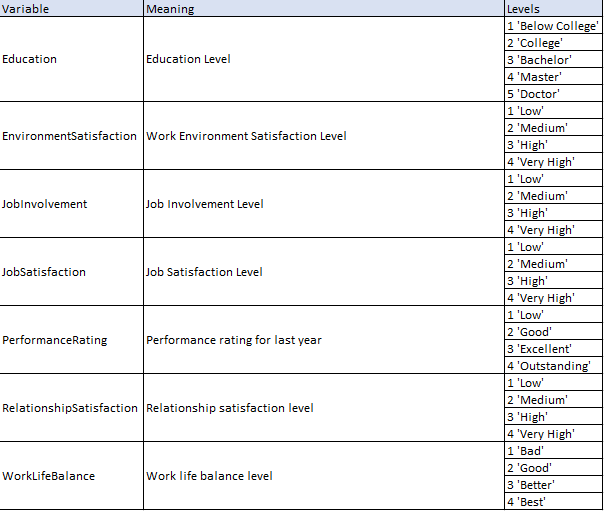

In [43]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlwAAAH/CAYAAACCfANtAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAExjSURBVHhe7d07kuvMcq7hf0onFCGjJ7IjtieHg9iOXJn0j6MByG5DnkYgh45iWWcKmkAfZBYKyCxUFUEU2UyS7xNR3U0SN+KS+FaBC/zrf/7f//7QaEfaX3/9VX2eRqPRaM9v1OgYTbaDIHDRDjcOZhqNRovbqNExGoGLNtw4mGk0Gi1uo0bHaAQu2nDjYKbRaLS4jRodowUKXP/x87e//uXn/1Zf+9+f//zXf/75P//639XXaM9tHMw0Go0Wt/1mjeZc3W5F4Prvn3/8018/f/v3YsB//5efv/7p337+0z63s/3fv//189ff/6P6mm8Erldt/mBO+9Bff/3zzz/+yw+XtrG81t7Oo23//kaj0Wif0XyN7p9rRxvn6nYrAldaWeUJS05ij1+BBK5XbdvA9c8/f/t7ZXtpcJ+ef+DBTqPRaDTfCFwx2iZw/c9//VtxQpSNk3srcg9FbrYXYz3Rymt5hfuV3xs/7QT/kMA3v243WrkRNRjm6dCj8dQm22B9nPaDf/x7uR/Vn69vx9v2E9sju93f2sNqb9j8vLaDvbg0Go0WuUl9Wx+nulgGrlotLjtbdJj5tdY52NfgfMUjt8cFvVdosg584JpX0HJi6l1OdK/NK7YIP37lF82Nn06yy7Aa/NYTrZuOvGaWSXaKzWVQ2q812YnWx3Ow+q9iP8rbzAb6vduxsp8s+5m8Zg5iv791hnXzluFsqKPRaLT3ab5GVwJXqxZvzvFznezUbleDZfwiE3xyqwSuqZmVVE24chLLrbYx5mHz8PvG3+4ErY24mcbU7Dxov9tk/a+PzX5Q7Ee6LU3g6m3H/fuJf2z3k+6wBC4ajfYhTWro+risi71abGqjqZnXarevwfK6n9+nNllP28C1bJBiw5iT5fL4lsDVHX+7E3QDF6k5TJOdaH1s94N8sJpta/aB5na8aT/xj7cHe2tY+XtbLGg0Gu3dmq/RZV3sn1Nzp8vec7Cvwbnleuvn+2mtEbjmlTydON1Kdd2LaZiberi646cNsgyrJ911em465QmZ9tTWDlzzNt5s13nbtbbj1f3EjuMf+4O9M+w0j3U4Go1Ge992LXB1z6ny2j/9y8/f7Pm9M3w9cEmTc8PaifKJrRm49KQ3vViunHwC1fZ32Qg3BK6ptcdPO8GhD81zOeipTbbB+rjYD/TAbB+ore14bT9ZD3T/2O8nnWF1Ocw8pvbJhYBGo71vk/q2PpY6aGtfqrvtc2oKSvYfwdJaw9sa7IeZ2odfmZJ1UA9cNNrOJjtR7fnITQKdDfD6D4wPLwY0Gu092yvW6HdsBC7acHvJg3nTw2V7wmg0Gu19GoErRiNw0YYbBzONRqPFbdToGG0JXPIHjUaj0Wg0Gu0x7XK5/KTYBRwgOxEAICZqdAx5O7A1cBgHMwDERY2OgcCFYRzMABAXNToGAheGcTADQFzU6BgIXBjGwQwAcR2q0X/OP19/nX6+54dH/Dl//Xyd/8yPYiiX6SHL2Fh3BC4MI3ABQFzVGv190udPzUT1/XP6Ov+kKPLn5/zl/7fdnpDy6MD1fTLLtCxr368ELrfuVrKc+lt/AgfknQgAEE9ZozWoTElLfu8PXF8/Sy7Z2fv1yMCV38NiCpBHQiCBCy+FwAUAcbVqdD9wWUXgkt4xEygktMg8tJkJbsLM3KuWWx7UDzeFFfPa9OLPVxlergW+xnzEtcDVei+uN03avEyt4WtkGP2tP4ED8k4EAIinVaNvC1wmbExtCSlFILLTdGFGQ1LZSzY/tgFuev40hbs8ngaaciGLwOf05qMPO4FLhq29F/e8BMJ5eq3hG/J24IyJw1oHMwDg+Vo1+rbAZUKM6YVyPTxzs2FpCTMSkoqZyfzT6zK91GMl45y+10ty1WXsBa7ufIplmtjHzffSCFzN4Rvkdf2tP4ED8k4EAIinVaOPB641xGjoaEzEhZtGEMpP5b+/Tyl4pd9rEHO016pxSfHKfNwyTezj9ntJAbMMVb33XkPgwjACFwDEdf/AlQKIjtsJPy7c6HBmGuVjDUqnpWdLxj2dp2GqCzhf4rSvyfTk8ZX5uGWabJex8l6mZbPjLFrDNxC4MIzABQBxlTVagpY8tzYbpmo6n+GaaE9PZVpluNFQZabhs1QKcT789AJhuUwm+HTm0w1ck+p7mZelNs3We6+RYfS3/gQOyDsRACAeavQYCaib4NhOgk0ELgzjYAaAuKjRgzY9XPsvI1oELgzjYAaAuKjRMRC4MIyDGQDikhpNi9EulwuBC8fJTgQAiIkaHUPeDmwNHMbBDABxUaNjIHBhGAczAMRFjY6BwIVhHMwAEBc1OgYCF4ZxMANAXIdq9I13UW+5dqPRu7jTsj4agQvDCFwAENemRts7sbe+BFru/F685u5Q3xzP+5XAVVnWiPJ24IyJw/JOBACIx9doG07S1+PUA5APMRq27N3VW98vWCBwrQhcGEbgAoC4ejV6VwC6dsnuXt9daEbcfN/jHKhaw78CWWb9rT+BA/JOBACIp12jUw/X1dwigarVg6RhzHxpc/G4G7hk2KIXTZfFPf/9c7JfIl0b/kUQuDCMwAUAcbVqtPYW7UksvcAlrxXTkCCUQ1UvcOn8p2WzTV9rBK7m8C9Clld/60/ggLwTAQDiqdVoDS+tEFXSXqvGJcVG4MpPXQ1c1cAnIWsbqtrDvwYCF4YRuAAgrrJG6+ejbgou6dKjG0dCmDzWMDZwSbEW5KYQZ8dZ9ILfCyBwYRiBCwDicjVaQ8vae5TanhAzh67aONLLZabnc1kncE2012oZ13xWy0zPTrM6/IuQZdbf+hM4IO9EAIB4Xq1G28+Aqcply1dE4MIwAhcAxPVyNXrTw/W6lxEtAheGEbgAIC5qdAwELgzjYAaAuKRG02K0y+VC4MJxshMBAGKiRseQtwNbA4dxMANAXNToGAhcGMbBDABxUaNjGAhccifY9/ifAxhz7GBm/+kp71UDAEcRuGKoBC5/S31t1ftfPPKEKTdY8zc0u/3OuPgt/mD+lP3nsYGRwAXgXnyN3umhd3U/Vj+H6mKAu9Tn7VAErj13b/3dEybi8gfzp+w/j1z+wcICAEYZuPbdrX2qcct3LZZ3mR/90uhj9XOsLtr38xyy3vS3/lSyIhobwN6+/3QyK6xcecVjd9v/PG0ZJj9nny827LyCNiu6+VUCad5ns0PRMfZYso5Xn7L/lMucuEI2j1jeNVmHmV+rDS82ywsAB0l9WU21ywQPW488O1zxj9jh3qJ6/bxmrC769/0MeTsUgWs+AWizJ7h1hacTRV5h5cqzj/14TXICbG3ciVvRurHLjW+X05y89MQ6smPgms3B/BH7T7nME5mOOaAlaOlkWsvWGn4yVlgAYOVrtFf+g7CuqKmups01c1PzZ1pDy9dS/Wz9wzadH+ZxzAubuuimbaeRlvd0StOJUktlWfS3/lSNE5xbwcKecMqTj3m8GW/lVqq02klp5la0TNNuncm603SWBQ+Rd6JE1vcn7D/b5zfLM7V1mvPymJDVHr5YXgAYILXFcrWnqIV1UlPrtWrD1WxT+xx53sxbxsn1dO8/RN0/lMvH8/Luem+/R9ab/tafqrGC7n3C1JVjxnEr+dgJMz3VWRY8RN6JElnfn7D/bJ/XItY4wHOgs8vRG94tLwAM8DXa0zpUq7FOWVOl/vkglIOYtjy9Vv3e1M/18WZaU7M181odT69vzwERyHvR3/pTyRuvLKhLj3ml5BVWW/nza8V4i2JDyIpaH185YZbTdI/bGxKPkXei5FP2n8rzOp3asBN57ev0c7LL1RneLS8ADPA1utSo2c62pi7hpqxjWuvmWnw0cO35h2gjcKWnXipw+XSZ31Q6Eabnvs7f0xsyK0ze/PLa2a1MO569vqsnyfy8fIjabJhlnPk5t6KFmZ+0db23NyQeQ9b/6lP2n/J9puVqLev0yvR+p+eK4tMafrO8AHCQ1JdFGVS0Fl47R5YBJtU/nYyMb+qa+8evhjE7Xtaps3v/IVpO2z1+mcAF3MYdzACAUHyNnv/xNz2X2rWwJcpx5t6t2a5//GrLIagTuCa7/yHa/IczgQtvKu9EAIB4qNExELgwjIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgLqnRtBjtcrkQuHCc7EQAgJio0THk7cDWwGEczAAQFzU6BgIXhnEwA0Bc1OgYCFwYxsEMAHFRo2MgcGEYBzMAxHWoRnfu+B7KqyznhMCFYQQuAIirVaPzHd3tN/2svs0d4/Od5mt3b5e7xMtrI6Fn5M7wdjljI3BhGIELAOKq1mjpGZqCynn5wudSGbi+fk6nyne86ncpTs8TuK4icGEYgQsA4trW6DXgyPcg1gOXNQ//XV6+qz2fe7xys0FKhrevyTjFc3N4ct+nuCxgmp8EP3n+1b7gX5ZZf+tP4IC8EwEA4ilrtP0S6JsC158Ujtb8k3rJ/vQ+R6U9YHMPlPxdnVmefn44T3d+uC7jHM6uL3BIBC4MI3ABQFyuRhfh6LbANf1pQtMybjFN1zslbQlPrc97+cC1GX9qKSAWwezFyPvQ3/oTOCDvRACAeFyNlsA0hxjb+pfnbNCR0CR/y+85ONnAVfZ2Fb1VSRm8KoGrmgIJXPhweScCAMTTq9E393BNZBwX0mzIspcQ9eE07CZwCZmmvVRoglQZ2hYELnw4AhcAxHXvwJUCUTsg5UCm7XRa/hfh5lKhmfHyWnXYPC8CFz5c3okAAPFQo2MgcGEYBzMAxEWNjoHAhWEczAAQFzU6BgIXhnEwA0BcUqNpMdrlciFw4TjZiQAAMVGjY8jbga2BwziYASAuanQMBC4M42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCI61CNbt7tPYjoy1dB4MIwAhcAxOVrdPpKHXluadVbzX8vd4jfP84tRu8ab5fvNch609/6Ezgg70QAgHh8jU7h6XpeKgOXDUdzABsKPAQu4GYELgCI61jgsmrhaAo803SX6ciXVk+Pc3PTd6/JdObAlp/Lwak5jTT/0yl9v+LypdkvRpZdf+tP4IC8EwEA4vE1ugg7U7sevmqBS/LRHH6qX2adH0sw2467mWZ3GvMy35YSw8nbgTMmDvMHMwAgkm6N1l6lax8+bwcuzUAyjSIMLWFMXqte+ium2ZtGY/6vhsCFYQQuAIirX6NbPVBWLfCY8RphaQljA4ErPUXgAhSBCwDi6tZoCToHergkDC1Bqnc5sHxtUUzz6iXF2jReC4ELwwhcABCXr9Hpw+7yXGp77mUlgceOM7WiNyoFt/V1+/Kfc/qwe2prcFqe3/mheQIXPl7eiQAA8VCjYyBwYRgHMwDERY2OgcCFYRzMABAXNTqGJXDJHzQajUaj0Wi0x7TL5UIPF46TnQgAEBM1Ooa8HdgaOIyDGQDiokbHQODCMA5mAIiLGh0DgQvDOJgBIC5qdAwELgzjYAaAuA7VaL3T+56boh706OkHRODCMAIXAMRVrdHzXd3LG8avvn9Oy3cgyt3p7x2O7PQ/A4ELwwhcABBXWaP1exCnpLV+OXQNgeveCFwYRuACgLhaNbofuKxG4Gp896F8R+LX8sWHMq6Zj1xK/LCgleXtwBkTh7UOZgDA87Vq9FDg0s9gmS+Uto8liOVQNT1/+loDmH5h9b6Zvh0CF4YRuAAgrocELglVxcgyvRSs1uElYJ2+p8dzANs/z/dD4MIwAhcAxPWbgSs/lf/+PqXx0u/KdD4IgQvDCFwAENdDAlfvkqLQQHZaera0p+s8DbNvhm+JwIVhBC4AiKus0RK05Lm1maBUJYGrMnzjQ/NJGmf58LwGsr0B7z3JOtLf+hM4IO9EAIB4qNExELgwjIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgLqnRtBjtcrkQuHCc7EQAgJio0THk7cDWwGEczAAQFzU6BgIXhnEwA0Bc1OgYCFwYxsEMAHFRo2MgcGEYBzMAxHWoRuuNSh/5NTwP/pqfhy//7QhcGEbgAoC4NjXa3iF+/uqdrSkQLa/9+Tl/yfC1O9Lnu9DfGm584NK739/1NvR2+WMgcGEYgQsA4vI1ehuklq/fccrhvn5Op6/tsBLeptdu703ygev+CFx4QwQuAIirV6PlS6XrgctKgev8XV6mqz8v05R5arO9VrZnTb7YuhhnXY4yjNnHKUidl++DlOfl9fT4+nt5Hlk+/a0/gQPyTgQAiKddo1MP1/UreXOw+lMML5+Tkl4k+3mp/JwOIBkrDy+haL0kmULZwcBlglX6Iu55ugE/t2URuDCMwAUAcbVqtIaeXZ+byoFr+lN6qeZxljBlgo7r3ZqbhiO99Ggv8flQdVvg8uOt78EsZ0B5O3DGxGF5JwIAxFOr0RpUdn/GyQYZCTzytwk+ZeCqhTgCF4EL4whcABBXWaNv/x+BPsiky3jm81LlJUUXlmb6/DoNDUpFcPKBa7106YclcOGedMeUHTrujmP9buAq/+WD8F5sf34EfzIBfper0cvxaNu1mloEmSI8pcdFCFqmvQ5nn/86f0/T9OO4Y8R8wP7rfH7XHq6ULPMb1XZTEvZuT9IRbDdaTvTS9hXOxjR2rAsZbqw4H5/3EbJOMr/zi7Q/+fcjzx09KPYELvbha4WH/bm0Z786bnMyAX6RHOd4vrwdisB19GT4LooCX1x7/j7tKcz9E16PnEzGziXH532EO5jlXzr2On3+15R9Q5tr+bfYG7jYh5v7APtzBYEL74vAFcMNgSsVpLP0YMgJdGq5iJb/grW9HL7QpMIpN0+T8ZfnTdehnW5vnvradNLYcy8OXZ75+fXE35q2LOM8rDQ5MTUDwjq/1PJ6q0xDnt2sCzPMXOz1X+5uvNY8Zm7dyWt75j05tM7rZJiVjL8uY5qv7Q6+ZVlq+0tavjRIWjfb5fPLsGq/t7ffh3X4GftzRRqufKm23q/tK+XwYrO8wC+S/RHPl7dDEbjmgqEtF8T5+VxEtMDNBcoV8HRCyrXFF5q5eNqKV70WvGOe82t52qmwz+PZ68lFj4sMlybXm7Z/DyKfOLpFs7MehFsXMqxdD8a6jBVuHvIe/DySK/M+vM7ryoPZnpC+p2Di791SLFt3WdJ4fj3J8snypOWsr6f5PSxtx3vrbLt32Yct9ueSDFc831rvrfXS3E7ykt2HgN+11kLas9vlctnfw7UWJPvYjFMUne3Jqph2pVBLoUrjXJvn+prMZ53OOh99vnjD16ddWU4lz8s01tc2068V4plfFzI/GccuQ1KeoJrzcIXfujLvw+u8TpbJWaa/jrvMX0+GZnrdZalth7zeOidxHaa2/XrvzYzz1vuwJcPI9NbhNvP6mP15+3x/vc/LY/aV9vDF8gK/TPZFPF/eDoOBa3o0F7iysPjHlZNAo1imp3rz9K9psWudrIrpJ71pV5bTWIp5GR7cifraCSqT+UpxXqfjTlC9edz5BHV9nddtD+Z5HDufvNzlvLvLUtsOZtrN5ZJhatuv/97ydi23k39cWabD69O/5vfVdT7+eas37dq6q8vvW7eRnd5H7c/b59vrPU1f5m+Xozd8fV0Bv4PAFcPdAtdUUabCefo5dYty5SSgBdg85x735ulf88XOzKcs8IvetP1yyrTXOiqvzcW8OEFIEV4fXzlJOGaaE3eC6s2jXHeLK/M+vM7rtgdzej9f0zKs71emMz0271N1l2X7Puzy6DavnqDTvPx44sp7k3m/6T5syXzWbZC2lT7+6P258nxzvU/ktXJf6QzfXlfA4xG4YmgELvkXqmmpGl8pXKnIlidAX2i2hVNJETbzW08GvXn612Q+1ZOVPJLXlunvK8TLOPp+5LV1+ey/YvWEsTwvBXh9/34a6XFeF36ZZFw/TfNw3zy0Vd5zZd7q0Dqvk/FLaf5+W6f3UZlWc1lq+4tfHpnm9kRWbC9pOtFr7+2d92FLhluXlf1ZFOtknndreaZXmvtKbfjN8gK/SPZHPF/eDmwNHMbBDABxHarRvR7ew1r/4Jk8ZH6xELgwjMAFAHGVNbrdc2tN4Wjpwa307BcBSXuubVd2VSdwufm9JwIXhhG4ACAuX6N9sNHwVQ1KtwWufQhc+lt/AgcQuAAgrl6Nrn8OtnQ9cJWfU3Sf1ZSmYSoFrlturP1O5P3qb/0JHJB3IgBAPGWNdpcUdyWe+T+J5HGW1ghcEsaW3ioJWTmsyd/TeHme+p9dbu0le12yzvS3/gQOyDsRACCeXo3W8HX1Ut6NPVzdwGUDVvn4vRG4MIzABQBx9Wu0DUQtt15SnHuy5uafJ3BxxsRhBC4AiMvVaLmMZy8j7rqsd2Pgmqa5hiyLwKW/9SdwAIELAOLyNbr8PNaewHPgkuIy/dRSxiNw6W/9CRyQdyIAQDy/XaM3//Ox7FX7UAQuDCNwAUBcv16jNz1cn9OL1UPgwjACFwDERY2OgcCFYRzMABCX1GhajHa5XAhcOE52IgBATNToGPJ2YGvgMA5mAIiLGh0DgQvDOJgBIC5qdAwELgzjYAaAuKjRMRC4MIyDGQDiOlSjixubvp7OTVWf9N4IXBhG4AKAuFo1Wr+4enqtfk/SKbDoF1CnO9NvhpGbmV790usjrt/VXm6sev1Gqr272Of39rsIXBhG4AKAuKo1WkLMFDrOU3jpB645mBUDbe4mfzfXA9c+BC68IQIXAMS1rdFrqJHgdLWzaBN4JMysoSj3lGlbJpbmcTql1ySclSGtFuTssi2K+bvvbZxoj1eevzQNUylwnc2yXX2fDybLoL/1J3BA3okAAPGUNdoGll2BS0OQGc5eTpx7ynL8WaeXxnGByl2GrAQrNY83h6S1NQKXm78NgvL3NF6ev8y72eP1O/J24IyJw/JOBACIx9XoordoX+CamC+gtj1Vrndrbum1WqAygagIaqvKeL0erm7gsgGrfPz78nbgjInD8k4EAIjH1Wjt6fEBSdoSYJpyYPHBRQNXNbHVe7ByWHKhybkxcOny1N4HgQtvKO9EAIB4ejV6dw/XRHu2pjDkAlYRhlb1wKXDf51+TrXX1I2BawqQ9eBG4MIbInABQFz3Cly5d6wcXnu5pudTy2GpEbj0+Wm46uVEcWPg0tfWHq51+QhceEN5JwIAxBOtRt8U8q6wnydT5rNm0RC4MIzABQBxharRzUuQB216uJ7bi9VD4MIwAhcAxEWNjmEJXPIHjUaj0Wg0Gu0x7XK50MOF42QnAgDERI2OIW8HtgYO42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCIixodA4ELwziYASCuQzX63rdvKD16+gERuDCMwAUAcVVrdOOu8avvn5P7Uuh7hyM7/c9A4MIwAhcAxFXWaLk7u9yNvX/HdwLXvRG4MIzABQBxtWr0/q/YaQSuuZcstzwt912HOq6Zj1xK/LCgleXtwBkTh7UOZgDA87Vq9FDg0s9gmS+Zto8liOVQNT1/+loDmH7R9b6Zvh0CF4YRuAAgrocErsqXRMv0UrBah5eAdfqeHs8BbP883w+BC8MIXAAQ128GrvxU/vv7lMZLvyvT+SAELgwjcAFAXA8JXL1LikID2Wnp2dKervM0zL4ZviUCF4YRuAAgrrJGS9CS59ZmglKVBK7K8I0PzSdpnOXD8xrI9ga89yTrSH/rT+CAvBMBAOKhRsdA4MIwDmYAiIsaHQOBC8M4mAEgLmp0DAQuDONgBoC4pEbTYrTL5ULgwnGyEwEAYqJGx5C3A1sDh3EwA0Bc1OgYCFwYxsEMAHFRo2MgcGEYBzMAxEWNjoHAhWEczAAQ16EarTcqfeTX8Dz4a34evvy3I3BhGIELAOLa1Gh7h/j5q3e2pkC0vPbn5/wlw9fuSJ/vQn9ruPGBS+9+f9fb0Nvlj4HAhWEELgCIy9fobZBavn7HKYf7+jmdvrbDSnibXru9N8kHrvsjcOENEbgAIK5ejZYvla4HLisFrvN3eZmu/rxMU+apzfZa2Z41+WLrYpx1OcowZh+nIHVevg9SnpfX0+Pr7+V5ZPn0t/4EDsg7EQAgnnaNTj1c16/kzcHqTzG8fE5KepHs56XyczqAZKw8vISi9ZJkCmUHA5cJVumLuOfpBvzclkXgwjACFwDE1arRGnp2fW4qB67pT+mlmsdZwpQJOq53a24ajvTSo73E50PVbYHLj7e+B7OcAeXtwBkTh+WdCAAQT61Ga1DZ/RknG2Qk8MjfJviUgasW4ghcBC6MI3ABQFxljb79fwT6IJMu45nPS5WXFF1Ymunz6zQ0KBXByQeu9dKlH/ZjA1eZQn+X30B4luOB67n7j8W+tMU6Ad6Dq9EafPwlv+u3dCiCTBGe0uMiBC3TLkNWev7r/D1N04/j6o35gP3X+WzOFe8WuFoJdaN/wnx0wX709I+LvdHvLe9EizvtPxb70vzQeWxgjbtOANxiU6PxFASuhyBwEbjuhcAFYAyBK4Z9gcveO2Nq66XfVPDPU2HOr9kC7Qv2dtg8HbkeXI63dBE25+2n35uG/p2nsUxgWp6vfffyaI5ffT9ygpyHlbb7Q4mvS96nc6f9x7Lbur3uZVaftC+l8czbULV53P6e0vN2HACvSY5tPF/eDu3ApX+bf2G7x+mkshTlYlhfsOcTUC7oevKb5yF/LycT8y/67ryL6femYU5UcuJJi+CXXZ6v3svjyvjV92Pn/wE2B3O5/prbsL//WOxL+qAg4+XhZq153Pye5CUCF/AOln9Q0Z7eLpdLJ3BJoc4VeCZFORXibcFvF+xyWPtY/q6cALrzrk1/Ow0ZpnzDtWXX4ZZ5rSekveP7x72T5PuRdeLcaf+x2Jf0QaEc79o8bnlP6bV1nQB4VXJc4/nydrg5cKWntgXfnjB9we6dVNJ4Mqwbpzvv7QmhNg35u5xG4ufvhytOkjvG948JXPfYfyy/rXvrPk2j3A/6y1FOvz6NvfuCH+6R+1I5Xm8et76n9JpdJwBeE4ErhuuBS/82Bd89loKfirgqhvUFu3dSmci4X6efkz25dOddTn/SnIY/KSV+/v7EY05yO8f3jwlc99h/LPYlfVAox5s05zG56T3JSwQu4B0QuGIoApcUcH9ZQUnvwPy8tPUfxKngtz70fNNJUk8s0zTyJaCsOe/aCaE+DT0BLtPIJxs//+ZJUh7tGL86PRm+fD9vSN5nIusgrad77D+W39b9dZ+2X2Xdv92+JMPlaa3Tq89D3PKe0vOt7QHgdcixjefL24GtgcM4mAEgrkM1utdbflj5j0vjIfOLhcCFYQQuAIirrNHtXnBrCkdLb7jvqVdFQJLPiLY+D7rqBC43v/dE4MIwAhcAxOVrtA82Gr6qQem2wLUPgUt/60/gAAIXAMTVq9H5fy/3XQ9c5Wc+tcdrmu/SNEylwFW7afUnkPerv/UncEDeiQAA8ZQ12l1S3JV45v9wk8dZWiNwSRhbeqskZOWwJn9P4+V56n9kurWX7HXJOtPf+hM4IO9EAIB4ejVaw9fVS3k39nB1A5cNWOXj90bgwjACFwDE1a/RNhC13HpJce7Jmpt/nsDFGROHEbgAIC5Xo+Uynr2MuOuy3o2Ba5rmGrIsApf+1p/AAQQuAIjL1+jy81h7As+BS4rL9FNLGY/Apb/1J3BA3okAAPH8do3e/M/HslftQxG4MIzABQBx/XqN3vRwfU4vVg+BC8MIXAAQFzU6BgIXhnEwA0BcUqNpMdrlciFw4TjZiQAAMVGjY8jbga2BwziYASAuanQMBC4M42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCI61CNLm5s+no6N1V90nsjcGEYgQsA4mrVaP3i6um1+j1Jp8CiX0Cd7ky/GUZuZnr1S6+PuH5Xe7mx6vUbqfbuYp/f2+8icGEYgQsA4qrWaAkxU+g4T+GlH7jmYFYMtLmb/N1cD1z7ELjwhghcABDXtkavoUaC09XOok3gkTCzhqLcU6ZtmViax+mUXpNwVoa0WpCzy7Yo5u++t3GiPV55/tI0TKXAdTbLdvV9Ppgsg/7Wn8ABeScCAMRT1mgbWHYFLg1BZjh7OXHuKcvxZ51eGscFKncZshKs1DzeHJLW1ghcbv42CMrf03h5/jLvZo/X78jbgTMmDss7EQAgHleji96ifYFrYr6A2vZUud6tuaXXaoHKBKIiqK0q4/V6uLqBywas8vHvy9uBMyYOyzsRACAeV6O1p8cHJGlLgGnKgcUHFw1c1cRW78HKYcmFJufGwKXLU3sfBC68obwTAQDi6dXo3T1cE+3ZmsKQC1hFGFrVA5cO/3X6OdVeUzcGrilA1oMbgQtviMAFAHHdK3Dl3rFyeO3lmp5PLYelRuDS56fhqpcTxY2BS19be7jW5SNw4Q3lnQgAEE+0Gn1TyLvCfp5Mmc+aRUPgwjACFwDEFapGNy9BHrTp4XpuL1YPgQvDCFwAEBc1OoYlcMkfNBqNRqPRaLTHtMvlQg8XjpOdCAAQEzU6hrwd2Bo4jIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgLmp0DAQuDONgBoC4DtXoe9++ofTo6QdE4MIwAhcAxFWt0Y27xq++f07uS6HvHY7s9D8DgQvDCFwAEFdZo+Xu7HI39v4d3wlc90bgwjACFwDE1arR+79ipxG45l6y3PK03Hcd6rhmPnIp8cOCVpa3A2dMHNY6mAEAz9eq0UOBSz+DZb5k2j6WIJZD1fT86WsNYPpF1/tm+nYIXBhG4AKAuB4SuCpfEi3TS8FqHV4C1ul7ejwHsP3zfD8ELgwjcAFAXL8ZuPJT+e/vUxov/a5M54MQuDCMwAUAcT0kcPUuKQoNZKelZ0t7us7TMPtm+JYIXBhG4AKAuMoaLUFLnlubCUpVErgqwzc+NJ+kcZYPz2sg2xvw3pOsI/2tP4ED8k4EAIiHGh0DgQvDOJgBIC5qdAwELgzjYAaAuKjRMRC4MIyDGQDikhpNi9EulwuBC8fJTgQAiIkaHUPeDmwNHMbBDABxUaNjIHBhGAczAMRFjY6BwIVhHMwAEBc1OgYCF4ZxMANAXIdqtN6o9JFfw/Pgr/l5+PLfjsCFYQQuAIhrU6PtHeLnr97ZmgLR8tqfn/OXDF+7I32+C/2t4cYHLr37/V1vQ2+XPwYCF4YRuAAgLl+jt0Fq+fodpxzu6+d0+toOK+Fteu323iQfuO6PwIU3ROACgLh6NVq+VLoeuKwUuM7f5WW6+vMyTZmnNttrZXvW5Iuti3HW5SjDmH2cgtR5+T5IeV5eT4+vv5fnkeXT3/oTOCDvRACAeNo1OvVwXb+SNwerP8Xw8jkp6UWyn5fKz+kAkrHy8BKK1kuSKZQdDFwmWKUv4p6nG/BzWxaBC8MIXAAQV6tGa+jZ9bmpHLimP6WXah5nCVMm6LjerblpONJLj/YSnw9VtwUuP976HsxyBpS3A2dMHJZ3IgBAPLUarUFl92ecbJCRwCN/m+BTBq5aiCNwEbgwjsAFAHGVNfr2/xHog0y6jGc+L1VeUnRhaabPr9PQoFQEJx+41kuXftiPDVxlCn0i3ZiyE8Rd2e/qeOAKtP9Y7EtF8QPwylyNXuqbbdfqcBFkivCUHhchaJn2Opx9/uv8PU3Tj+NqjvmA/df5bM4V7xa4ipXX1j9h5hScVtieNbBdWXuTuAw3doI4Pu9Pl3eixZ32H4t9qfTYsErgAt7HpkbjKfJ2uH/gKq7Xfp/2TO94OpUT2tj57Pi8P93DAxf7UgWBC8A+BK4Y9gUu07UnbT0ZpaJ/dt2Ec5HefEAuk3HWaa3djXKSMs/P4/rCXwwzL6P2HrjxWvOYufcjr+2Z9+SG9XDXzozg5P0699h/LPalijRc+ZLMZ5nuPKK8JztvHWZ+rTa82CwvgJclxzeeL2+HduDSv81Jxj1OJ6OlMBfD5pNXt3C7k6mcrPwJzRV+GbZ+9tF5NV4q5iHL7OeRXJn3jvWwLJueTLcnw3e1OZh13YzvPxb7UkmGK56X6SzLJqPO76O1XlrDTwhcwPuQ2kmL0S6XSydwVU5MUphTMd4W/e3JSgq8zGg9wUgxdwux9ySp85Nxtiegcr7NebiTj3X7Cbq9Hionwzcm69e56/5jsS+tts9vlnNq6zTn5TEhqz18sbwAXpoc23i+vB1uDlzpqW3Rb50wlxOKnbYwJ4DpwZWTZCbzlRPEOh0339487nySrK+H7Xp5Z5uD+QH7j8W+JLbPyzzK6WZ5ndnl6A1fX1cAXhGBK4brgUv/NicP9zidrJbCbF6Tgr3WcjkBzSeU4iQlJ4L18d6TpDDTnLiTZG8e5ftZXJn31fWw5yT5nrqB6+p6q+8/FvtSbV+qPK/Taex38trX6edkl6szfHtdAXg1BK4YisCVToDypCu2ctKZn5e2nvxS0a9/6HmdlrZ1pHTSWp6Xk8B6QpNCr8/Pz9nCv7y2jOunaR7um4e29QTUm7e6sh7M0mxPhm9M1kVyz/3HYl8yizMr1sk879byTK9oqFzC4qy3/PVtAeDVyPGN58vbga2BwziYASCuQzW612N+WOsfkJOHzC8WAheGEbgAIK6yRrd7wq0pHC094tuPSZQBSa8E2EsDVZ3A5eb3nghcGEbgAoC4fI32wUbDVzUo3Ra49iFw6W/9CRxA4AKAuHo1Wnqmrn9e83rgKj/36T77Kk3DVApcn36TcM6YOCzvRACAeMoa7S4p7ko883+6yeMsrRG4JIwtvVUSsnJYk7+n8fI89T8P3dpL9rpknelv/QkckHciAEA8vRqt4evqpbwbe7i6gcsGrPLxeyNwYRiBCwDi6tdoG4habr2kOPdkzc0/T+DijInDCFwAEJer0XIZz15G3HVZ78bANU1zDVkWgUt/60/gAAIXAMTla3T5eaw9gefAJcVl+qmljEfg0t/6Ezgg70QAgHh+u0Zv/udj2av2oQhcGEbgAoC4fr1Gb3q4PqcXq4fAhWEELgCIixodA4ELwziYASAuqdG0GO1yuRC4cJzsRACAmKjRMeTtwNbAYRzMABAXNToGAheGcTADQFzU6BgIXBjGwQwAcVGjYyBwYRgHMwDEdahGFzc2fT2dm6o+6b0RuDCMwAUAcbVqtH5x9fRa/Z6kU2DRL6BOd6bfDCM3M736pddHXL+rvdxY9fqNVHt3sc/v7XcRuDCMwAUAcVVrtISYKXScp/DSD1xzMCsG2txN/m6uB659CFx4QwQuAIhrW6PXUCPB6Wpn0SbwSJhZQ1HuKdO2TCzN43RKr0k4K0NaLcjZZVsU83ff2zjRHq88f2kaplLgOptlu/o+H0yWQX/rT+CAvBMBAOIpa7QNLLsCl4YgM5y9nDj3lOX4s04vjeMClbsMWQlWah5vDklrawQuN38bBOXvabw8f5l3s8frd+TtwBkTh+WdCAAQj6vRRW/RvsA1MV9AbXuqXO/W3NJrtUBlAlER1FaV8Xo9XN3AZQNW+fj35e3AGROH5Z0IABCPq9Ha0+MDkrQlwDTlwOKDiwauamKr92DlsORCk3Nj4NLlqb0PAhfeUN6JAADx9Gr07h6uifZsTWHIBawiDK3qgUuH/zr9nGqvqRsD1xQg68GNwIU3ROACgLjuFbhy71g5vPZyTc+nlsNSI3Dp89Nw1cuJ4sbApa+tPVzr8hG48IbyTgQAiCdajb4p5F1hP0+mzGfNoiFwYRiBCwDiClWjm5cgD9r0cD23F6uHwIVhBC4AiIsaHcMSuOQPGo1Go9FoNNpj2uVyoYcLx8lOBACIiRodQ94ObA0cxsEMAHFRo2MgcGEYBzMAxEWNjoHAhWEczAAQFzU6BgIXhnEwA0Bch2r0vW/fUHr09AMicGEYgQsA4qrW6MZd41ffPyf3pdD3Dkd2+p+BwIVhBC4AiKus0XJ3drkbe/+O7wSueyNwYRiBCwDiatXo/V+x0whccy9Zbnla7rsOdVwzH7mU+GFBK8vbgTMmDmsdzACA52vV6KHApZ/BMl8ybR9LEMuhanr+9LUGMP2i630zfTsELgwjcAFAXA8JXJUviZbppWC1Di8B6/Q9PZ4D2P55vh8CF4YRuAAgrt8MXPmp/Pf3KY2Xflem80EIXBhG4AKAuB4SuHqXFIUGstPSs6U9XedpmH0zfEsELgwjcAFAXGWNlqAlz63NBKUqCVyV4Rsfmk/SOMuH5zWQ7Q1470nWkf7Wn8ABeScCAMRDjY6BwIVhHMwAEBc1OgYCF4ZxMANAXNToGAhcGMbBDABxSY2mxWiXy4XAheNkJwIAxESNjiFvB7YGDuNgBoC4qNExELgwjIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgrkM1Wm9U+ttfw2PuaP+U+T8WgQvDCFwAENemRts7xM9fvbM1hZ/iNfl6nmW8qS13kb8b+xVC2/m/Olln+lt/AgfknQgAEI+v0TbI/Pk5f7WCkw88+nVALgDJuPfugSJwAV0ELgCIq1ejpdfqak/Vnst7ve9V3PuafNn1m11GtOQ96m/9CRyQdyIAQDztGp16uK59obReSuwNpIHMfAG2fdx7TXu01tfSJUsCF9BE4AKAuFo1+mqQmvnhJCTl3qo5HEkvVTEduQSpPWfXXnOXDe0lxfdD4MIwAhcAxFWr0Rqi9n5GSi/7lUHIhKNGqNKnrr1G4AL2I3ABQFxljdYPwBchqC9demyGo6OXFIvXuKQ4QlemdDualY2387DAxf7ze+64rqVo3v+/iwM4ytXo5Vi3bV/I0aBmx7MBTHvB1tdcnuu8lkJWev7r/P2A//kYh7xH/a0/1Zxk5xWQVsKx4rlcp30L5XrZe2KS8fywt//rIjZZHyv2n/t7/D50z3U9Hri27xfAcb5G41nydtgErrWWpw/IHantUsTfJ1cUJwFN7HuS+PufPPzBzP5zf4/fh+65rglcQCwErhh2BK5UjHMBtd1/67+wU4E8ndJrMqyMswyXux2b3Yrb8fVEPY13XqYj4SadvNdhxPpcarZQy2unn7NZZndSccuzjtd7j+W006utZUjrcnl+Xg/+hNRfRrcezTQikeVasf/U36PVWN5lWnZ6j9+Hxte1t102M323fov3ptuo/n4zuy8JXdfzwtXX+7X5998L8A5k/8bz5e3QDlz2Q23ytymAUvzScHORXKuyWl+f2OlsHtfGT4UyF8F0UjDLocW5Qk4UyzLOxTZPV08iNiTZ4jvrvkczvJtPwb1WjDepnpBqy+iWpbG8AfiDmf2n/h6t+vt1fnkfGlvXnl+2gn1f8nd1Otv3u2itl13rfbIZ/8p2AN5A+scGLUK7XC79z3DleuT+BTm3VFjrBdIVvUpxldfb48vJYT0p6ryX8f3wm+VyJxh7YjWPXeFd9d+jeb4Yt70M2/cmw/qTZWMZd54sn03e76pYT1Nj/9kMVX2/7eXYDi/D3nMfGlvXnl+29Lj+vmR55Dm77KI3D/MezHvrrfdb1ivwjmS/x/Pl7bAJXEW9VVq4ai80CteeIp6eqo3vTyJ+3mZ4/de3KdibE0zjRNQ7YV59j2kdLSeV7jJs35vMY9fJUv/enkCi8QdzWje1VfjZ+49VWd4n70Nj69pzy9Z9X1lexjxcfx55+nY+zfV+43oF3pGv0XiWvB12Ba5N8VrUC5cr4jquGcY9ro3vTyK+oJrhixOfzNP/C9our3lcLk+29z3a4brLsH1v7oRkl0mZx9N0WyfISPYGrt3rdvZe+49VWd4n70Nj69pzy9Z9X5ZMNy/DlXnI8nydfk52mNZ6v3G9Au+IwBXDbYFroieuaaTU+kXYFXEhxW8Z175WG3/nCXOiRTRPV778cimonRPRpP5eWs9vl1Hmm08s7WUw05ufk8e7TpZ6EjHTnVpruzyTLNeK/af1/Kr9fpfxfnkfGlvXnl+29vvy60leWxegfL+eLMP2NT+9Pdv3+nsB3oHs+3i+vB3YGgHJicKeuPQkWDtbPhkHc1yvsg/dahMQATQdqtGtXuMHKf+hVj4e9svvp4bAFdmmd+K5O0sLgSuwF9mHbhKgcAKvpKzRrd5g77vo7bd1ZGp3/hfP/QNX2YNt389zyHrT3/oTOCDvRACAeHyN9sFDw1c1PJWB67GX3wlcwA4ELgCIq1ejNx87qGoELvmIwhJiioDjPge6Pq8BLz9vgt61wFUfT5ardtPn+XOeefgnB61MlkV/60/ggLwTAQDiKWt0K/S0SbAxAab4TykSjHxAagQ0+TiACT/2s5jdwNUcb16uPBENefnjBvH+U0zeDpwxcVjeiQAA8fRqtIavqz1AjQClchgzn6t0PV8rF/TmlkNVL3C1x5N5289z2scELryhvBMBAOLp1+hemMo6wyz/MWdn4Gr0qF0NXNXxCFz4MAQuAIjL1WgJQza8uMtwLa3AlT4rJZNzoUhDWGX4zv8w7gWu9ngELnwYAhcAxOVrdApJ8lxq18KWkCBjx5naFK58z1MaZs1c9jLgGnx6zzcD16Q+Xi9wmXGuXjL9HbIs+lt/AgfknQgAEA81OgYCF4ZxMANAXNToGAhcGMbBDABxUaNjIHBhGAczAMQlNZoWo10uFwIXjpOdCAAQEzU6hrwd2Bo4jIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgLmp0DAQuDONgBoC4DtXozl3hX095g9RBB9cNgQvDCFwAEFerRuc7sS83i3emkFLcod3f7X1qu+/gvvdrdh71dTw+cH2fpmWvv+mdtutmj7wdOGPisLwTAQDiqdZo6aWZQsN5Ch97ApeGlCJk1J6rixW4xhG48CQELgCIa1uj12AjoelqZ0/3y6NzQCpDTX4s85p7xKRpUCmeaw4n0zDPuS/ETtM/m1439z70S7nn8U4nt2z+exr709FQmacj7UDQymR8/a0/gQPyTgQAiKes0TZw7ApcEl6qQSOFpDR+K3CJNeApmV51psVwJbcccxjL09GAlecnr63TSZdCe4GrMZ25F3CdX2fZdiBwYRiBCwDicjW66K16SuDS16THyA4vtoGr/bmxzvw2y+uHrfVwVadD4EI07mAGAITiarT24JgAM7c1gFQMXVIUrZ4rGUbm3xiunO8mADXmd6/ApX/vXEc7yDT0t/4EDsg7EQAgnl6N3tXDpUFoCh1uwPK5FE7yQ38ZrxW4RJpOGq8YrghO+nmqPYFLg9o6Hb8s6fGuwDXNfzRkWQQuDCNwAUBc44FLzAFrmlZumzBies++zmcXZFLoSYHpO/+dm1kAO5xMXUPWMtzJ/O/ATlCaLNOZ2tf5e1p2/9quwKXBzcx/avvWVZ2Mr7/1J3BA3okAAPFQo4+RsOdCpQTKgcRF4MIwDmYAiIsafdCmh8v2hN2OwIVhHMwAEBc1OoYlcMkfNBqNRqPRaLTHtMvlQg8XjpOdCAAQEzU6hrwd2Bo4jIMZAOKiRsdA4MIwDmYAiIsaHQOBC8M4mAEgLmp0DAQuDONgBoC4DtXo8mt17u3R0w+IwIVhBC4AiKtao+e7wrfv4/nduav7PdjpfwYCF4YRuAAgrrJG69flTEmr/7U+BK57I3BhGIELAOJq1ej936PYCFzmuxOl5Wltv6vQzEcuJX5Y0MryduCMicNaBzMA4PlaNXoocOlnsL5+llxlH0sQy6Fqev70tQYw/VLpfTN9OwQuDCNwAUBcDwlclS9ylumlYLUOLwHr9D09ngPY/nm+HwIXhhG4ACCu3wxc+an89/cpjZd+V6bzQQhcGEbgAoC4HhK4epcUhQay09KzpT1d52mYfTN8SwQuDCNwAUBcZY2WoCXPrc0EpSoJXJXhGx+aT9I4y4fnNZDtDXjvSdaR/tafwAF5JwIAxEONjoHAhWEczAAQFzU6BgIXhnEwA0Bc1OgYCFwYxsEMAHFJjabFaJfLhcCF42QnAgDERI2OIW8HtgYO42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCIixodA4ELwziYASCuQzVab1T6yK/hefDX/Dx8+W9H4MIwAhcAxLWp0fYO8fNX72xNgWh57c/P+UuGr92RPt+F/tZw4wOX3v3+rreht8sfA4ELwwhcABCXr9HbILV8/Y5TDvf1czp9bYeV8Da9dntvkg9c90fgwhsicAFAXL0aLV8qXQ9cVgpc5+/yMl39eZmmzFOb7bWyPWvyxdbFOOtylGHMPk5B6rx8H6Q8L6+nx9ffy/PI8ulv/QkckHciAEA87RqderiuX8mbg9WfYnj5nJT0ItnPS+XndADJWHl4CUXrJckUyg4GLhOs0hdxz9MN+Lkti8CFYQQuAIirVaM19Oz63FQOXNOf0ks1j7OEKRN0XO/W3DQc6aVHe4nPh6rbApcfb30PZjkDytuBMyYOyzsRACCeWo3WoLL7M042yEjgkb9N8CkDVy3EEbgIXBhH4AKAuMoaffv/CPRBJl3GM5+XKi8purA00+fXaWhQKoKTD1zrpUs/LIGrWFmRlEn5RejOKTt13J0nu0fgYv95oBfZlx61D8Tdt4Df4Wr0Ug9su1bjiiBThKf0uAhBy7TX4ezzX+fvaZp+HHecmg/Yf53Ppg6/VeCSBc4ryq+snv1FbbtCbk/bt+ifMG+Zd071aQd47HuV4cZOEr+3nvNOlLD/PMb770v794HbPGq6wKvwNRrPkrdDEbhMcdWU2T7hZCMnzMe6Uw9Fcf35+7Rnmsffq5zQxs5nv7eet4GL/ef+3n9fInABj0HgiuF64CpOOFK8ZCRtpor7oibjzMNoy9OTaZvn5wCzKYimK1HaOpu0LGezDOtrxbSXZe6NU1tuP+zyWhG4ViPvtb7M2nvgxmvNY+bWl7z2yPW8Ja+vZN7sP3lYt1yL3rzs85+1L5XTlMfLNOeR5P1shplfqw0vNssKfBg5JvB8eTu0A5cU0rnITpWrcX+NK0XNTqOc/sSNW702nB/PJ4s8Uy3y88lK/jZFdtUZZ+KXOw3rH6/Lkk9e3eJ9y3ttLnOaV+OlYh5+GVcPWs8V/mBm//GP/bKq5rwKt7zvzjRfZV/aTLO2r7TWSWv4id9GwOfRf4TQQrTL5dL5DJcpYlK47IjSciEri9pm2FqRnLlxKycOKZ7pdSnetljbx3Nh3xTz3jjlcpfDTs9sTlZ5/azv4fB71fnVlnk73+Y83AnIetR63pLlWbH/2PG3+49ozWvgfXem+Sr7kp3mZhmntk5vXhYTstrDF8sKfCA5HvB8eTsUgSsX13TydEVwe/ZQrqjpv3BNUXX/+jxWvNNTe4q3PCcFNz/fH8cX4+306ifM9LyON/JeF+UyF/PtzePOJ8n963nlD2b2Hzu91v6TFPMaed+LcvmLZejN48n7kp2m/N3aV2TaMtze4d2yAh+IwBXDlcAlD02BLou14YpaUbilQK6PrxRvnUc5//x4b/GWeewr+L4Yy2trQLDzluHWem6mP/JeHbvMaTrL/HrzKNfX4jfWc9IOXPJQpjuPa/8uuGV7w/2nzczrw/el7TTrw+lrX6efU2s/K7TXE/AZCFwxXA9cEynKuWBJ8ZKRUluHK4uaFvI8nHxJpSnyyzTm5zYFUU4KyzzMyWJTrNfHfrmmtp5hugXfzzu9Vv+Ar7xWm/70ysH32l7mNE3zcN88tPltos/dcT3XyLgr9p9rHxBvz2uawgfvS+U0W8syvaKBMi9L1lt2t6zAh5FjAs+XtwNbQ7VPBmjjYM7YfwDEc6hG93qZD+vUyIfMLxYCl8MJ8wgCV8b+AyCeska3e4+tqZ4tvcjbKxdlQNKe81qXvtOrkXZ+74nAhWEELgCIy9doH2w0fFWD0m2Bax8Cl/7Wn8ABBC4AiKtXo6Vn6vpnHK8HrvKzku6zotI0TKXAtedGyO9I3q/+1p/AAXknAgDEU9Zod0lxV+KZ/6NKHmdpjcAlYWzprZKQlcOa/D2Nl+ep/9nm1l6y1yXrTH/rT+CAvBMBAOLp1WgNX1cv5d3Yw9UNXDZglY/fG4ELwwhcABBXv0bbQNRy6yXFuSdrbv55AhdnTBxG4AKAuFyNlst49jLirst6NwauaZpryLIIXPpbfwIHELgAIC5fo8vPY+0JPAcuKS7TTy1lPAKX/tafwAF5JwIAxPPbNXrzPx/LXrUPReDCMAIXAMT16zV608P1Ob1YPQQuDCNwAUBc1OgYCFwYxsEMAHFJjabFaJfLhcCF42QnAgDERI2OIW8HtgYO42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCIixodA4ELwziYASCuQzW6uLHp6+ncVPVJ743AhWEELgCIq1Wj9Yurp9fq9ySdAot+AXW6M/1mGLmZ6dUvvT7i+l3t5caq12+k2ruLfX5vv4vAhWEELgCIq1qjJcRMoeM8hZd+4JqDWTHQ5m7yd3M9cO1D4MIbInABQFzbGr2GGglOVzuLNoFHwswainJPmbZlYmkep1N6TcJZGdJqQc4u26KYv/vexon2eOX5S9MwlQLX2Szb1ff5YLIM+lt/AgfknQgAEE9Zo21g2RW4NASZ4ezlxLmnLMefdXppHBeo3GXISrBS83hzSFpbI3C5+dsgKH9P4+X5y7ybPV6/I28Hzpg4LO9EAIB4XI0ueov2Ba6J+QJq21Plerfmll6rBSoTiIqgtqqM1+vh6gYuG7DKx78vbwfOmDgs70QAgHhcjdaeHh+QpC0BpikHFh9cNHBVE1u9ByuHJReanBsDly5P7X0QuPCG8k4EAIinV6N393BNtGdrCkMuYBVhaFUPXDr81+nnVHtN3Ri4pgBZD24ELrwhAhcAxHWvwJV7x8rhtZdrej61HJYagUufn4arXk4UNwYufW3t4VqXj8CFN5R3IgBAPNFq9E0h7wr7eTJlPmsWDYELwwhcABBXqBrdvAR50KaH67m9WD0ELgwjcAFAXNToGJbAJX/QaDQajUaj0R7TLpcLPVw4TnYiAEBM1OgY8nZga+AwDmYAiIsaHQOBC8M4mAEgLmp0DAQuDONgBoC4qNExELgwjIMZAOI6VKPvffsGZW4++pDpx0bgwjACFwDEVa3RjbvGr6ZwtNwNfr47/DR8bvWv07nG3u3dTv8z5O3AGROH5Z0IABBPWaPl7uxyN/b+Hd/LwGW+budw7xSBS3/rT+AAAhcAxNWq0fu/YqcIXNI7toQlCVG296v4HsS5J03b6fT07zN8prwdOGPisLwTAQDiadXo2wKXDVWdS4qbMLYGsPQl1wQuzpg4rHUwAwCer1WjD/dwzb1aedwUpEwgy4HLhS9hLyl+nrwdOGPisNbBDAB4vlaNPh640rjay1V+nkseE7iqCFwYRuACgLjuH7hMD1cRqmSay2MNY1xSzAhcGEbgAoC4yhqtoWh6bm2+92qr/xkuNz35YLwJYPZy49f5e5oOgYszJg7LOxEAIB5qdAwELgzjYAaAuKjRMRC4MIyDGQDiokbHQODCMA5mAIhLajQtRrtcLgQuHCc7EQAgJmp0DHk7sDVwGAczAMRFjY6BwIVhHMwAEBc1OgYCF4ZxMANAXNToGAhcGMbBDABxHarR5Vf2/Arz1T9Pmf9jEbgwjMAFAHFtarR8Hc/0nDb3XYfWFH6K18ovqbZ3m78P+12L2/m/Olln+lt/AgfknQgAEI+v0TbIpK/sqQcnH3jcdyQqGffePVAELqCLwAUAcfVqtPRaXe2p2nN5z/aaTc19Kfbe1+R7GN/sMqIl71F/60/ggLwTAQDiadfo1MPlAlCFXkrsDaSBzHwBtn3ce017tNbX0iVLAhfQROACgLhaNfpqkJr54SQk5d6qORxJL1UxHbkEqT1n115zlw3tJcX3Q+DCMAIXAMRVq9EaovZ+Rkov+5VByISjRqjSp669RuAC9iNwAUBcZY3WD8AXIagvXXpshqOjlxSL17ikeHeDCVY3kHRlmg14R7LB7/9fXd/b7wauffvP1e148350fL+NsE89ahk4XoD4XI1eap9t+2qbBjU7ng1g2gu2vubyXOc1qSH5+a/z9wP+52Mc8h71t/6c6Jv3a2o60ZT/bVSeOxp4Wieu+vNlEpfH1wv8nMbnjZg25L6F5QRyu7wTieftP165HY/tR9a++dZE2KcetQwcL0B8tkbjefJ2sGfMny+bWnMatifRzXXXW7ROXPtOaHKidOfzKglc5oSu72HfyZITyO3cwfy0/ce7th337UcWgauG4wWIj8AVwzZw6YllDSupoJ7dyWZTZJvdhSn4nE6pyzCNY09c8ncevn5Cs/PSXoo8n/mELa8vzy0zLgKXO8GneS7jFD0t/r31hk3Lezbzdydwt078+lyev+2MH5a8l5Wsl2fsP145D/t4/35kbbf3vv2kXJbesNt53Gufqq2Pcpyy10+HmV9rzaOcLoB45LjF8+Xt4LaGLbzf08nu/Cddokt1ttZ71HqcxvMngXRS+Z5PPOtL+XmvLOiuZ6LoTVlfm+ebTxBTa54UXBjbzs+pBbe8MHoytEHArJOsubyvrTyYn7P/eOV2PLYfWWl+yzTK5bYC7lNuGVrjuGUx26kzj+57AxCCPRfSntsul0vxoXkpvKkCzyc3U1j1RGOC0TLsSgpyKsLFyVXNJ5Wp+dHWeVm9E6W8Vr6Z+nzTPJvjmZNJOb/2sOXymsfuxLVqL+9rk/fhPGX/8Wrb0T7etx9Z5fa+Mo1g+5RdhvY4Mr9tyOrNw04XQExyzOL58nYoz5ip0NuTYS7A5QmyccJMT7VOmPO0WycXoyzom5NcMe9kO9/lJF6e8M2JJT008+sOWy6vedw7OVaX97VtD+Zn7D9eud8c24+s7f65TOMF9im7DL1x8nGyd3g7HICYCFwxNAKXnOimwjud7NZiKsV/erxcGprpCcScFN3jzglz+ksLefNkk5QF3Z4o07y242znK9OexytOXDI9+9jNrztsubzmcblOsubyvrbtwfyM/ccr95tj+5GV9qFlGnY5X2CfcsvQG0de+zr9nOx67wxfrlcA8RC4YmgErlRIyw//6smhVnjlJDJNKLf1hNo/YeqjaZqpYKcT2jqdNF73RDlJy+nHSfO10zInykl6H3OTL8tsnRwn7WE7J8dJfbnaz78yeS+l9D79+3vs/uOV27G2Xa/vR1aab/1D82l6y/gB96lyGdrjzMeOWX7Rm7edLoB45LjF8+XtwNbAYRzMABDXoRq9s/f8V0RalgEELgwjcAFAXGWN3tMrrj3sS093/6pRXXmFonbFYi+7LK9L1pv+1p/AAXknAgDE42u0Dy8avuznKxZl4DJhaVePE4GrRODCMAIXAMTVq9Gtz8F6RVgq/vOP6zHT8CbDmx4x/Y849nEadzueSPPyN7x+D/J+9Lf+BA7IOxEAIJ6yRteDTk8RoKa2BCH9n81r+Fr/Q1LZo1U87o63d7lei6w3/a0/gQPyTgQAiKdXozV8Xb1cV4an7598qyUX3uaWwlg/cO0f733Ie9Tf+hM4IO9EAIB4+jVawtO1gLMNQflSpAanam/UjsC1a7z3QeDCMAIXAMTlarR8/soGHb0P4q0fgF97uKbk1PgAfT9w7R/vfRC4MIzABQBx+RotgcZeyttzf6tyHP9hdn95cA1Ly/Plh+RrH5pfxiNwAU15JwIAxEONjoHAhWEczAAQFzU6BgIXhnEwA0Bc1OgYCFwYxsEMAHFJjabFaJfLhcCF42QnAgDERI2OIW8HtgYO42AGgLio0TEQuDCMgxkA4qJGx0DgwjAOZgCIixodA4ELwziYASCuQzW6eSf4O/ut+QRA4MIwAhcAxNWq0flO79WvNJwi0Gn5Uuv+neZvU95J3s7nveXtwBkTh+WdCAAQT7VGS8/SFHTOp72By4SkoV4pAhdnTBxG4AKAuLY1eg09383AZRUhSb7w2oQk952Iy8RkHNsrJgGteO5DglYm71l/60/ggLwTAQDiKWu0BKR8SXB/4DJBaWrLJcW5p2zNYvP0JJRVJ1yEtw+StwNnTBxWHswAgDhcjS4uBx7q4ZLLgNM0ZTzXuzW3FMbSMKlnyyJwccbEYXknAgDE42q09DxpEKqFpJZtSJKgJuNo4OomtjJ4Ebg4Y+KwvBMBAOLp1ejRHq6yx6xOxs/zIXBxxsRhBC4AiOs+gavdI+YvK6YwtbnUaGayvMaH5oHb5J0IABAPNToGAheGcTADQFzU6BgIXBjGwQwAcVGjY1gCl/xBo9FoNBqNRntMu1wu9HDhONmBAAAxUaNjSNvh5+f/A/KFBHSueIAhAAAAAElFTkSuQmCC")


## 3.0. Data cleaning

The goal of this phase is to clean our data by replacing NaN values. This task is very important, since most of the machine learning models require No Missing Values in our data:

In [44]:
attrition.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance     

#### 3.1. Check for NULL VALUES

In [45]:
attrition_null_value_col = attrition.isna().sum()[attrition.isna().sum()!= 0].reset_index().rename(columns=
                                                                        {'index': 'col_name', 0: '#'})


In [46]:
attrition_null_value_col['%'] = attrition_null_value_col['#'] / attrition.shape[0]

In [47]:
attrition_null_value_col

,col_name,#,%
0,NumCompaniesWorked,19,0.004308
1,TotalWorkingYears,9,0.002041
2,EnvironmentSatisfaction,25,0.005669
3,JobSatisfaction,20,0.004535
4,WorkLifeBalance,38,0.008617


As we can see, have missing values in some columns. Compared to the lenght of the data, this is not too much. However we need to assess those values:

##### NumCompaniesWorked

In [48]:
attrition[attrition['NumCompaniesWorked'].isna()].head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,days_off
115,116,27,No,Travel_Rarely,Sales,2,3,Finance,1,Male,1,Sales Executive,Divorced,23670,NaN,Y,12,8,1,5.0,2,5,0,4,3,3,4.0,2.0,3.0,15
210,211,52,No,Travel_Rarely,Sales,2,1,Computer Science,1,Male,1,Technician,Divorced,99800,NaN,Y,11,8,1,18.0,2,10,6,9,3,3,4.0,1.0,3.0,5
343,344,40,No,Travel_Frequently,Sales,9,3,Marketing,1,Male,3,Senior Director II,Single,22380,NaN,Y,14,8,0,10.0,3,1,0,0,3,3,1.0,3.0,3.0,17
476,477,22,No,Travel_Rarely,IT,8,3,Other,1,Male,2,Sales Representative,Married,49070,NaN,Y,21,8,1,4.0,2,4,1,1,3,4,2.0,1.0,2.0,21
647,648,29,No,Travel_Rarely,IT,3,3,Technical Degree,1,Female,2,Healthcare Analyst,Divorced,48050,NaN,Y,16,8,1,9.0,2,7,1,7,3,3,4.0,4.0,2.0,11


We are going to replace the NaN values with "0". This value is not present in the data.

In [49]:
attrition['NumCompaniesWorked'] = attrition['NumCompaniesWorked'].fillna(0)

##### TotalWorkingYears

In [50]:
attrition[attrition['TotalWorkingYears'].isna()].head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,days_off
23,24,42,No,Travel_Rarely,IT,4,4,Finance,1,Male,1,Senior Director II,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6,1,3,2.0,3.0,3.0,7
137,138,43,No,Travel_Frequently,Sales,14,3,Finance,1,Female,1,Senior Director II,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2,2,3,4.0,4.0,3.0,22
308,309,47,Yes,Travel_Frequently,IT,4,3,Finance,1,Male,1,Senior Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3,3,3,2.0,3.0,3.0,17
574,575,37,No,Travel_Rarely,IT,23,3,Finance,1,Male,3,Senior Director II,Divorced,166590,7.0,Y,16,8,1,NaN,2,6,1,3,3,3,3.0,4.0,3.0,5
1517,1518,36,No,Non-Travel,IT,5,4,Finance,1,Male,1,Sales Executive,Married,85780,7.0,Y,21,8,0,NaN,4,9,0,8,3,4,2.0,2.0,3.0,18


Again, there is not much information on the dictionary that we can refer too. Also, it doesn't seem to be a pattern on these NaNs. We are going to replace it with 0.

In [51]:
attrition['TotalWorkingYears'] = attrition['TotalWorkingYears'].fillna(0)

##### EnvironmentSatisfaction

No pattern of these NaNs could be detected. There is no much information on the data dictionary. We are going to use the same logic as the previous ones:

In [52]:
attrition['EnvironmentSatisfaction'] = attrition['EnvironmentSatisfaction'].fillna(0)

##### JobSatisfaction

Although these people have several experience in their jobs, the Job Satisfaction was not reflected on the data. Since there is no enough information on the data dictionary, we are going to replace these values using the same logic as before:

In [53]:
attrition['JobSatisfaction'] = attrition['JobSatisfaction'].fillna(0)

##### WorkLifeBalance

No pattern was detected as the previous examples. Let's replace these NaNs with the same logic as before:

In [54]:
attrition['WorkLifeBalance'] = attrition['WorkLifeBalance'].fillna(0)

In [55]:
### CHECKING NANS again:
attrition_null_value_col = attrition.isna().sum()[attrition.isna().sum()!= 0].reset_index().rename(columns=
                                                                        {'index': 'col_name', 0: '#'})
attrition_null_value_col['%'] = attrition_null_value_col['#'] / attrition.shape[0]

attrition_null_value_col

,col_name,#,%


#### 3.2. Checking zero variance variables (not meaningful)    

We are going to check those variables which show no variance, that means, displaying just one single value. Also, our master key EmployeeID will no longer needed:

In [56]:
attrition.select_dtypes(exclude = 'object').apply(pd.Series.nunique, axis = 0)

EmployeeID                 4410
Age                          43
DistanceFromHome             29
Education                     5
EmployeeCount                 1
JobLevel                      5
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       5
JobSatisfaction               5
WorkLifeBalance               5
days_off                     24
dtype: int64

In [57]:
attrition.drop(['EmployeeCount', 'StandardHours', 'EmployeeID', 'Over18'], axis = 1, inplace = True)

### 4.0. Exploratory data analysis

Now that we have our data cleaned, we move to the next stage wich is analyzing the data and get some insights about our dataset from attrition.

#### 4.1. Numerical features

This section will contain deep analysis of our numerical features. They are basically stored in a data type of integer or float.

**4.1.1. Plotting the data (Probability Densities)**

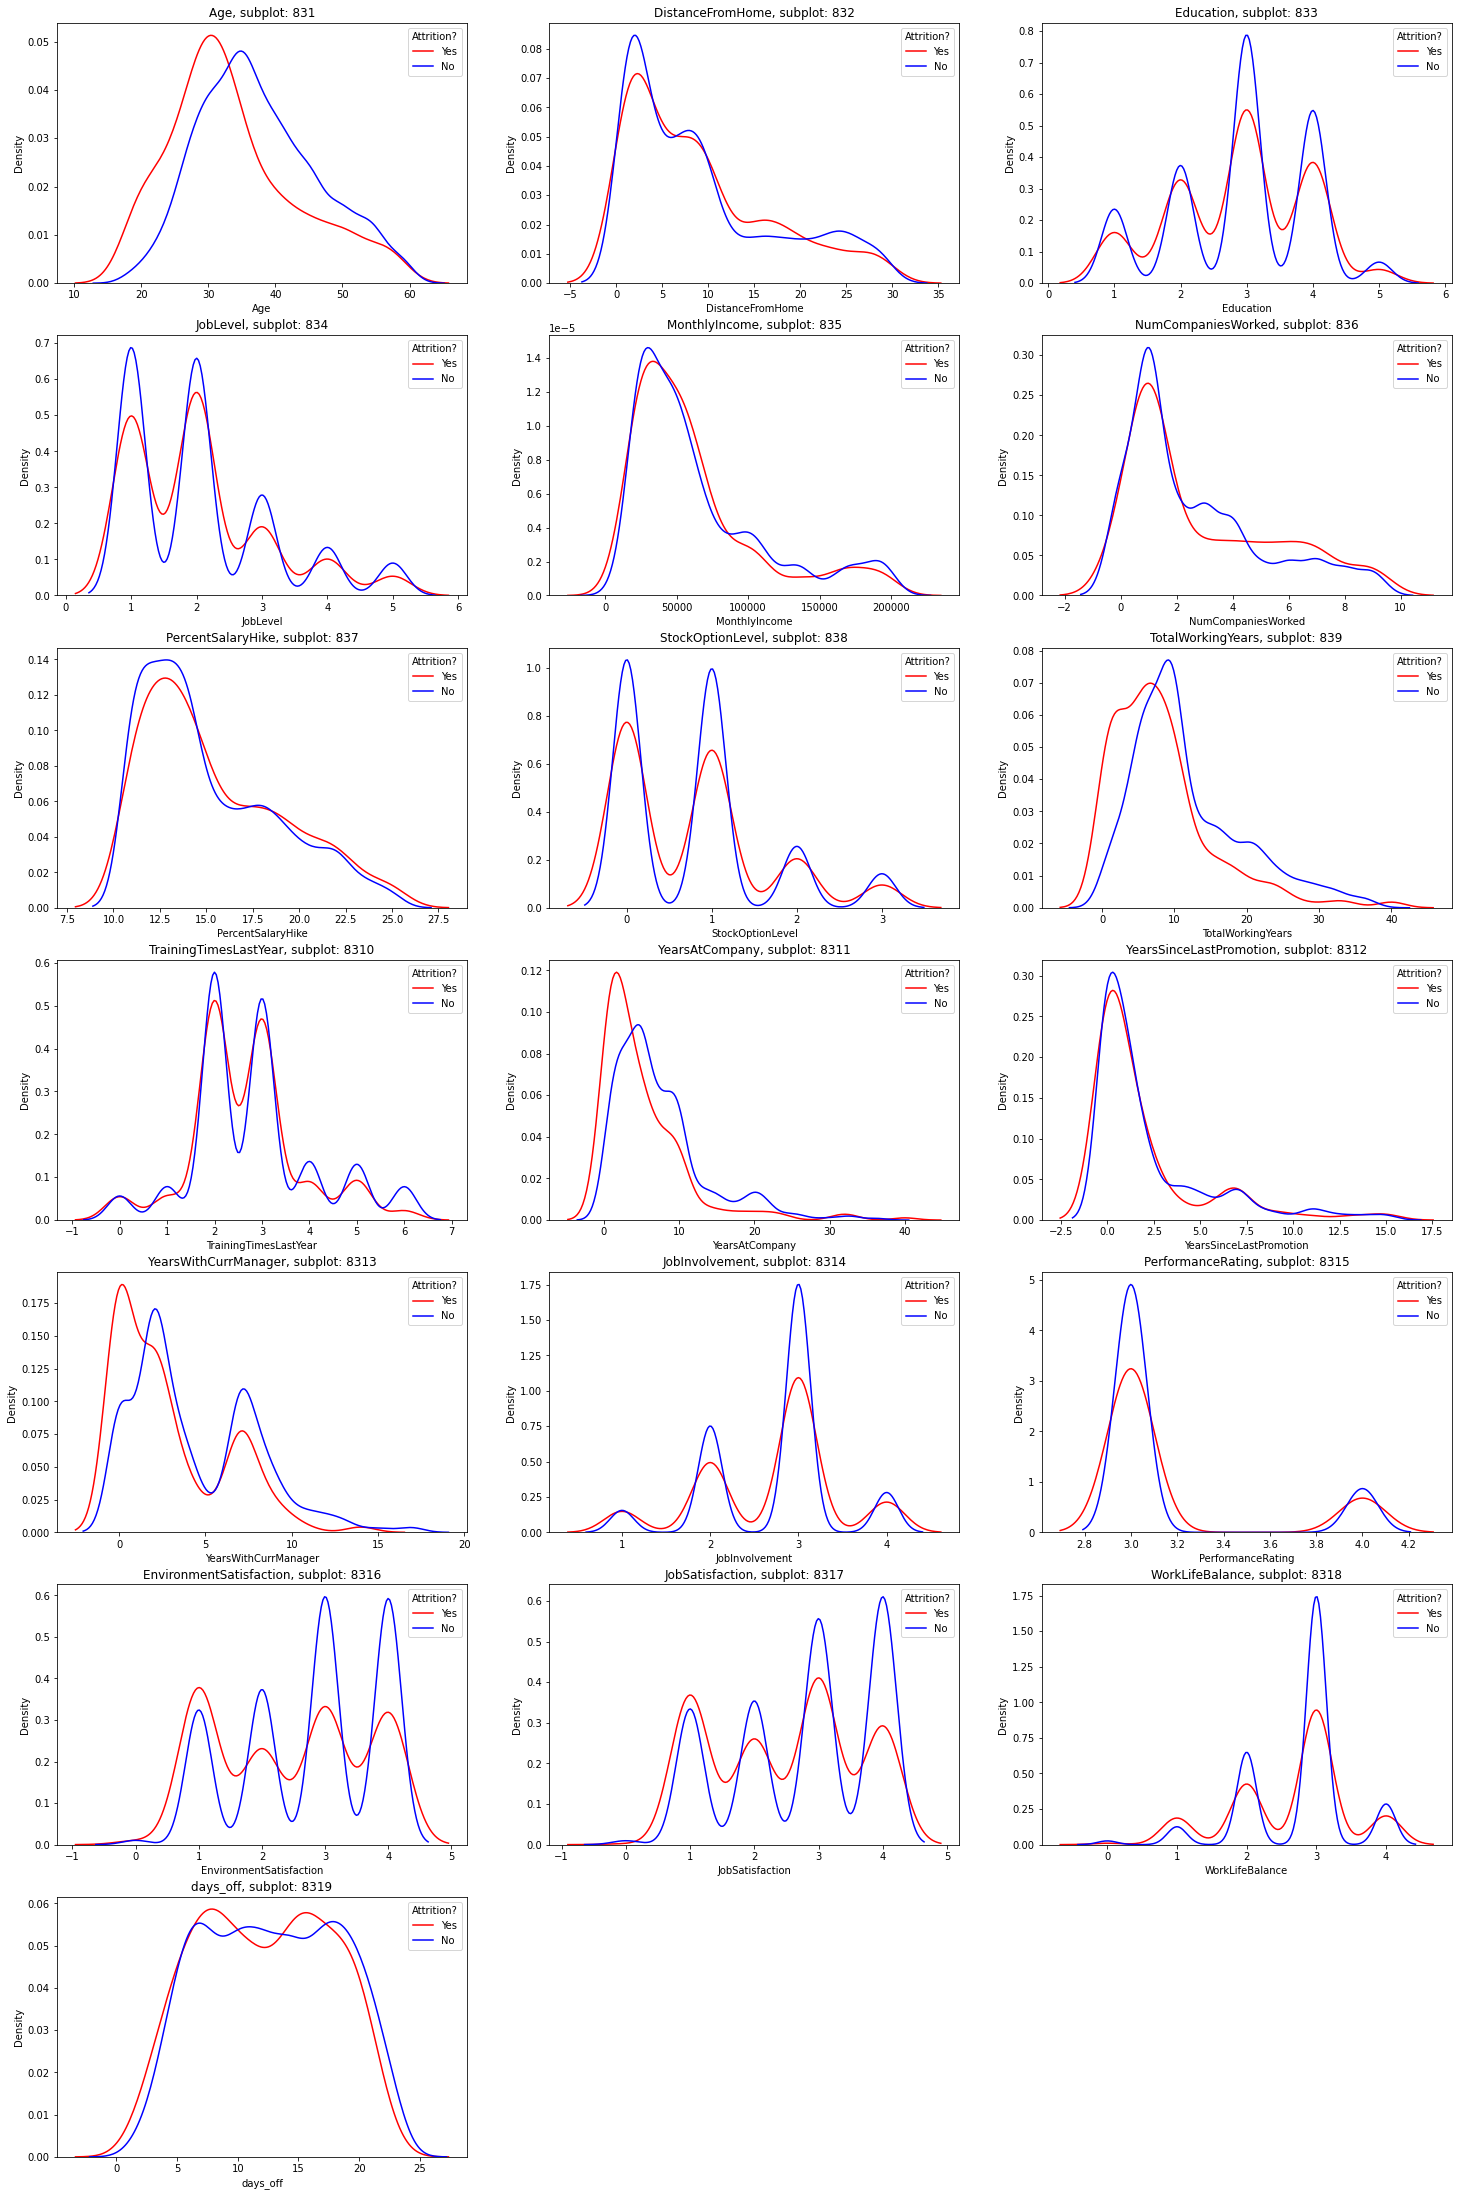

In [58]:
num_feats = list(attrition.select_dtypes(include = ['int64', 'float64'] ).columns)

#  Categorical Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25,45))

for i in num_feats:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(attrition[attrition.Attrition == 'Yes'][i], color="red", hist = False,  kde=True, norm_hist=True)
    sns.distplot(attrition[attrition.Attrition == 'No'][i], color="blue", hist = False,  kde=True, norm_hist=True)
    plt.legend(labels=['Yes','No'], title = 'Attrition?')
    c = c + 1

plt.show()

**Key Insights**

1. People around 30 years tend to attrit more than those who not (aging in about 35 years).
2. The higher the total working years, the less amount of attrition. There appears to be a significant different between those who attrit and those who not. Particularly, people with 10 years of working experience (in general) tend to be significantly more stable. The distribution is quite related with those who have worked in our current company as well.
3. Our BPS employees whose performance is around 3, tend to be more stable in our current company, specially. The reason of this, is that most of our employees stay around to this performance ratio. This is a red flag for future analysis, because performance rating is not that greater for the current period.
4. People leaving their work before 18:00 hrs. tend to be more motivated and consequently, they are less likely to attrit.
5. It appears to be significant difference between those who attrit and those who not, in terms of the years working with their current manager. Also, the more confident they are with their current managers, the less likelihood of attrition.


**4.1.2. Plotting the data (Cumulative Densities)**

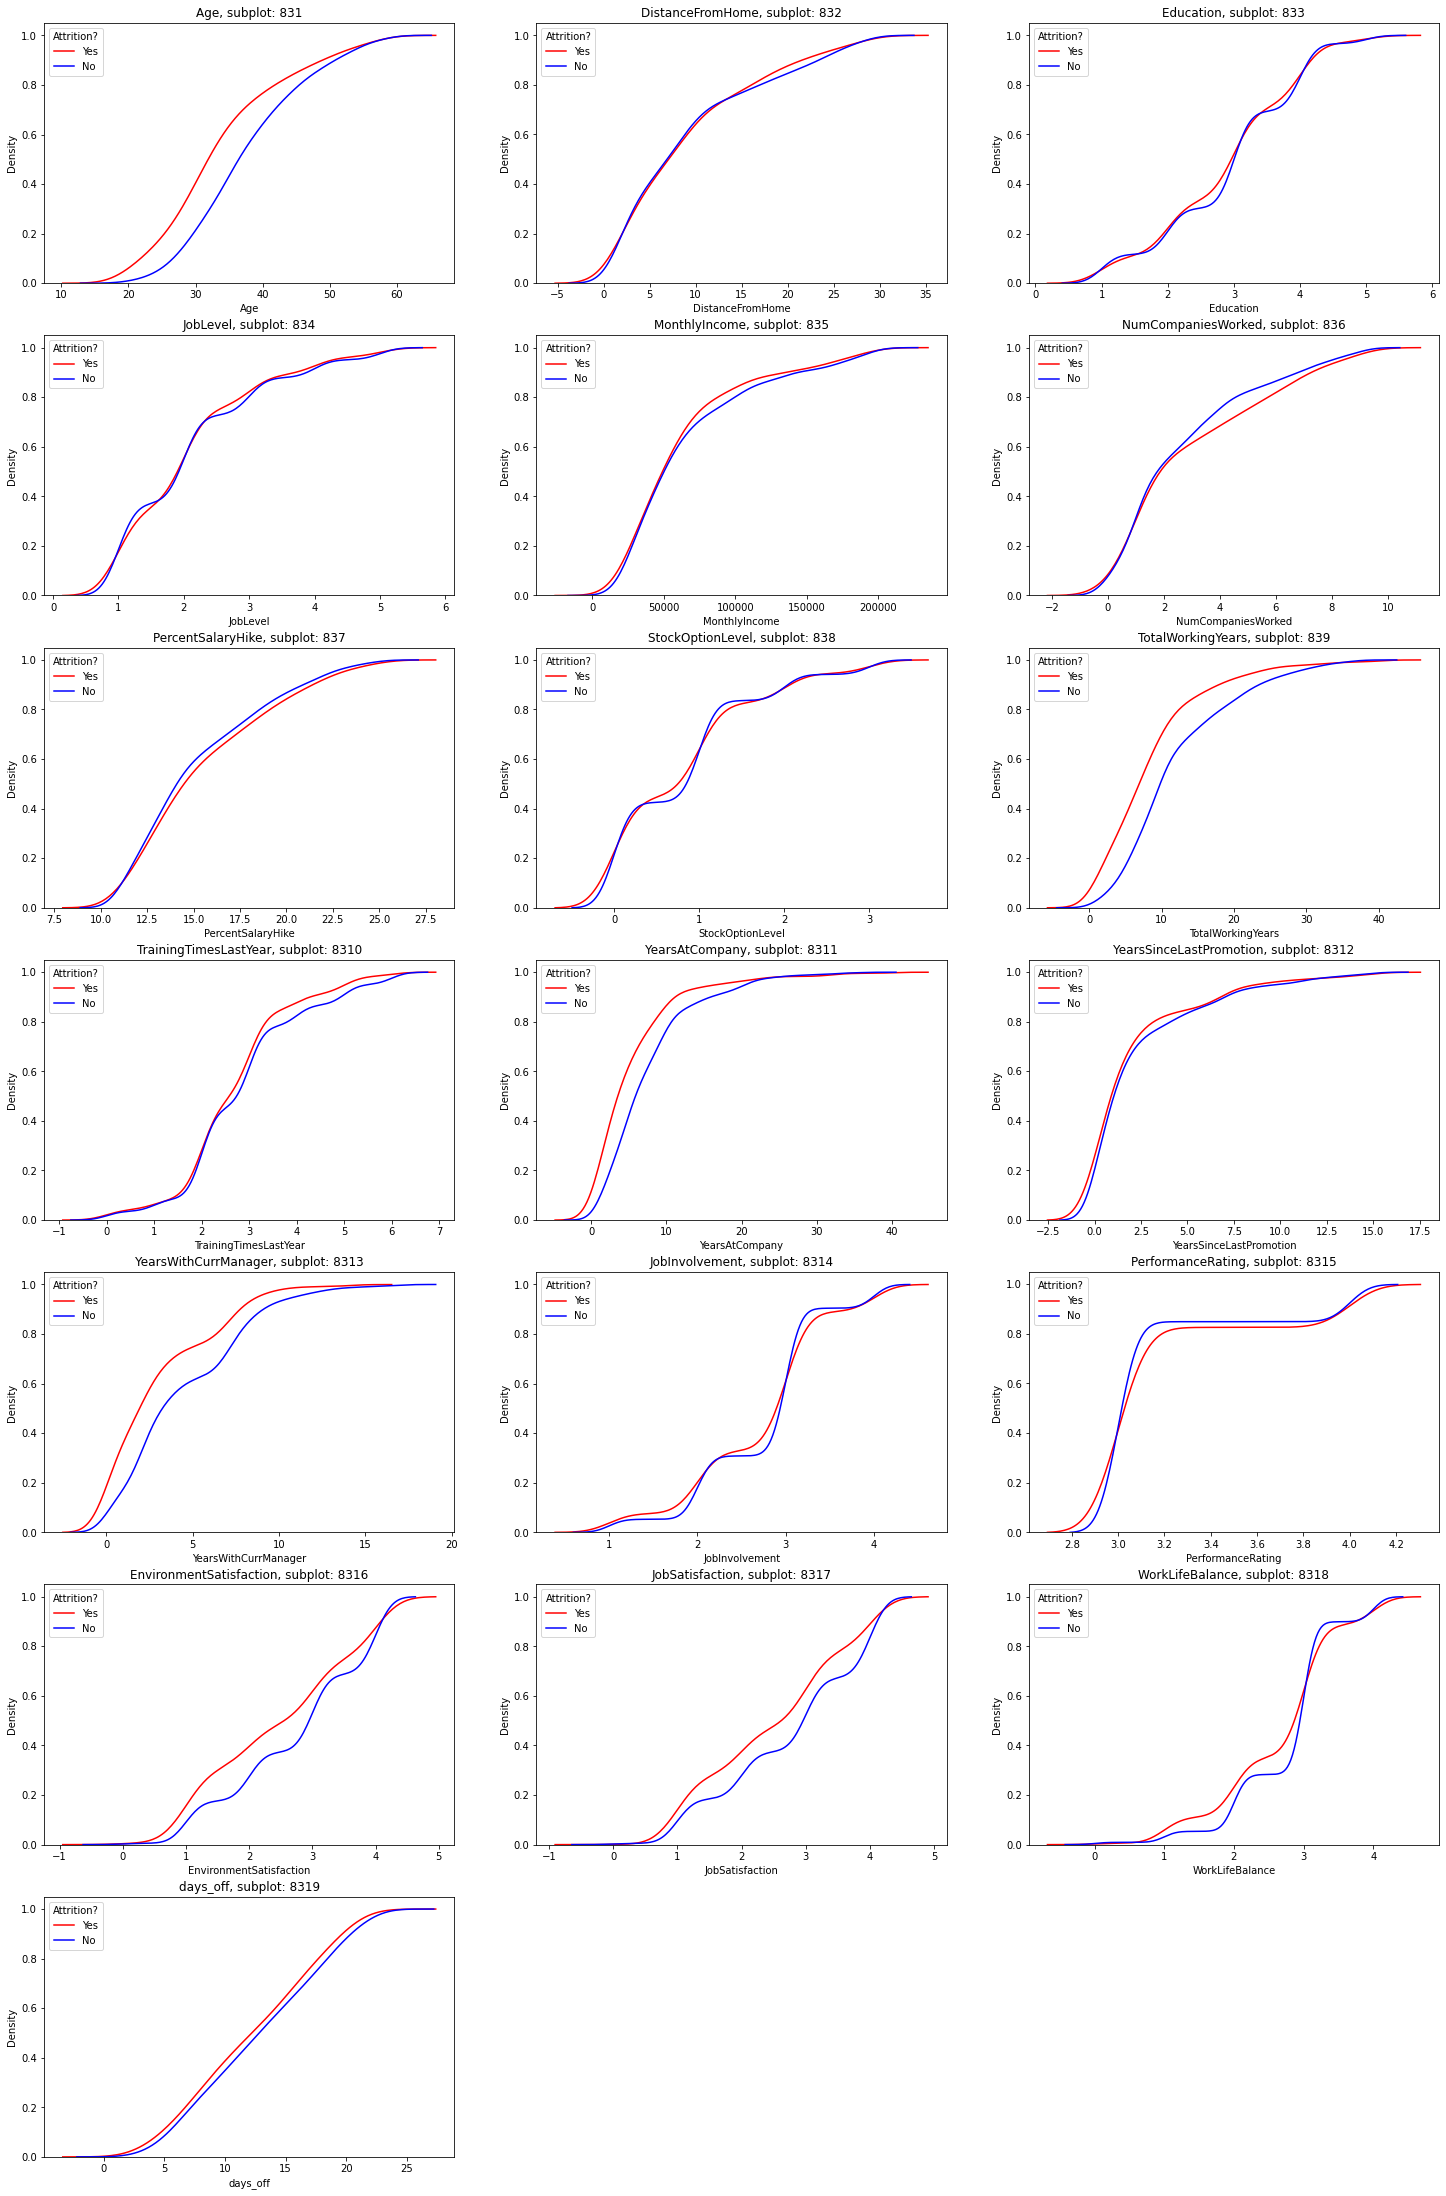

In [59]:
num_feats = list(attrition.select_dtypes(include = ['int64', 'float64'] ).columns)

#  Categorical Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25,45))

for i in num_feats:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(attrition[attrition.Attrition == 'Yes'][i], color="red", cumulative = True)
    sns.kdeplot(attrition[attrition.Attrition == 'No'][i], color="blue", cumulative = True)
    plt.legend(labels=['Yes','No'], title = 'Attrition?')
    c = c + 1

plt.show()

**4.1.2. Key Insights:**

Cumulative density plots help us to understand “accumulated” probability for each of the numerical variables, and comparing them to the attrition. Here we can spot a couple of insights:

1. Years at company is not really affecting after 15 years. There is not significant difference starting in that point. Probably this feature will not add to much value in our final model.
2. Performance rating. Again, is evident that between 3 and 4, there are no statistical difference between those attrit and those who not. Again, we can assess later on if this variable will be significant in our models.


#### 4.2.0. Categorical features

In [60]:
# Storing our categorical features
cat_feats = list(attrition.select_dtypes(include = ['object'] ).columns)
cat_feats

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [61]:
cat_feats = list(attrition.select_dtypes(include = ['object'] ).columns)


def plot_cat(cats = cat_feats, a = 1, b = 1, c = 1 ):
    fig = plt.figure(figsize=(15,20))
    for i in cats[1:]:
        
        grouped_df = attrition[['Attrition', i ]] .groupby(['Attrition', i]).size().to_frame('Percent')
        grouped_df['Percent'] = (grouped_df['Percent'] * 100 / sum(grouped_df['Percent'])).round(0)
        grouped_df = grouped_df.reset_index()
        
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.barplot(x=i, y = 'Percent', hue='Attrition', data=grouped_df)
        c = c + 1
    plt.show()



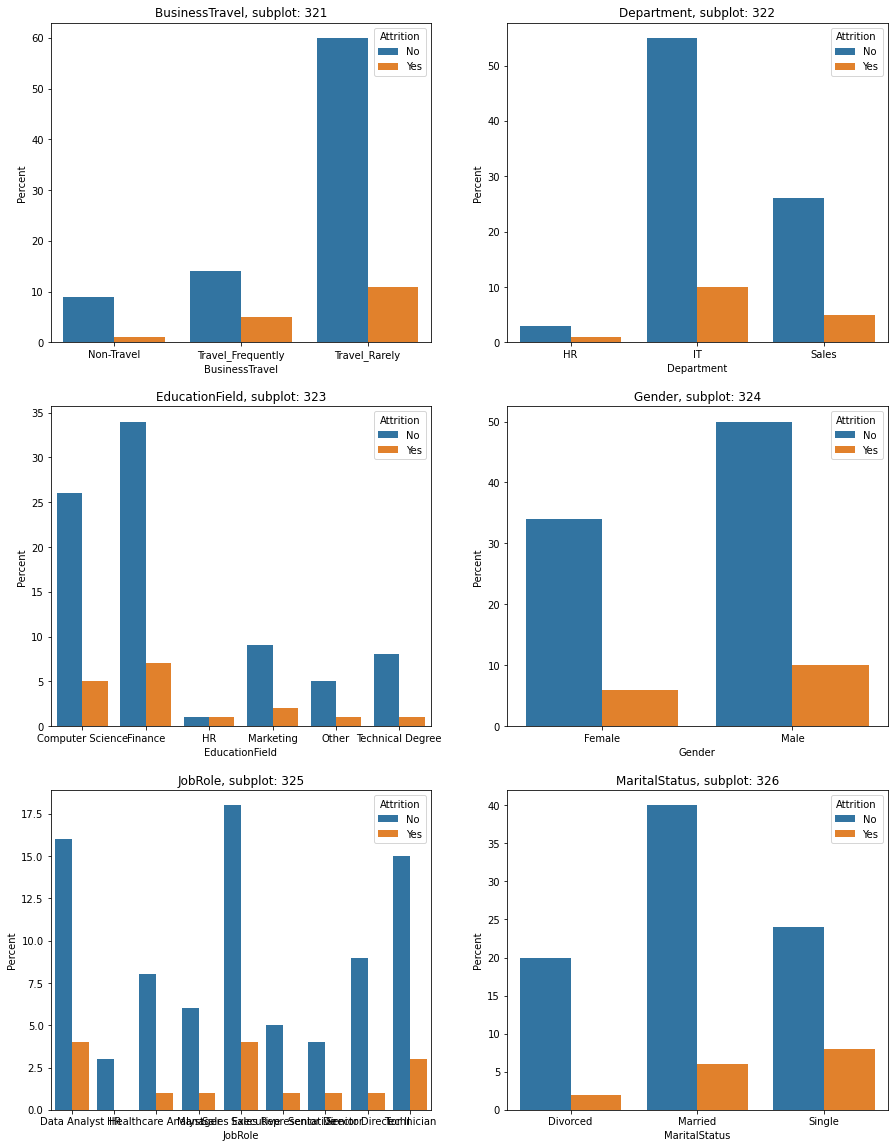

In [62]:
plot_cat(cats = cat_feats, a = 3, b = 2, c = 1)

**Key Insights:**

1. 60% of people who travel rarely are the ones who don’t attrit. There are about 10% of attrition for those who do travel rarely. The reason being, is that the majority of employees in our company don’t usually travel.
2. The majority of employees in our business belong to the IT department. It represents around 50% of the employees who don’t attrit. In short, we need to put our efforts in maintaining this rate during the next periods.




## 5.0. Feature Engineering / Data Preparation

Before applying any machine learning model, we need to assess the quality of features that will be imputed in our models.

**1. Outliers:** data is sometimes skewed, and some machine learnings will be impacted by this situation. For that, it’s highly recommended to reduce that variance by applying transformations in our features. For instance, log transformation or standardize them (which makes our data more consistent and stable)

**2. Encoding categorical features:** by default, every machine learning is required to have numerical features as input. For this reason, there are methods that will convert each level (in every categorical feature) into a numeric value. For instance, gender has two levels: Male and Female; so, if a particular row in our data belongs to Male, then we are going to assign a 0 to it. On the contrary, if the row in our data has Female as its level, then we will be assigning 1 to it. This process is called “encoding”. After we built our models, we can of course return the values to the original ones.


#### 5.1. Outliers assessment

In [63]:
# creating two variables for numerical features and categorical features
numerical_columns = attrition.select_dtypes(exclude = 'object').columns
nmerical_data = attrition[numerical_columns]
categorical_columns = attrition.select_dtypes(include='object').columns
categorical_data = attrition[categorical_columns]

In [64]:
len(numerical_columns)

19

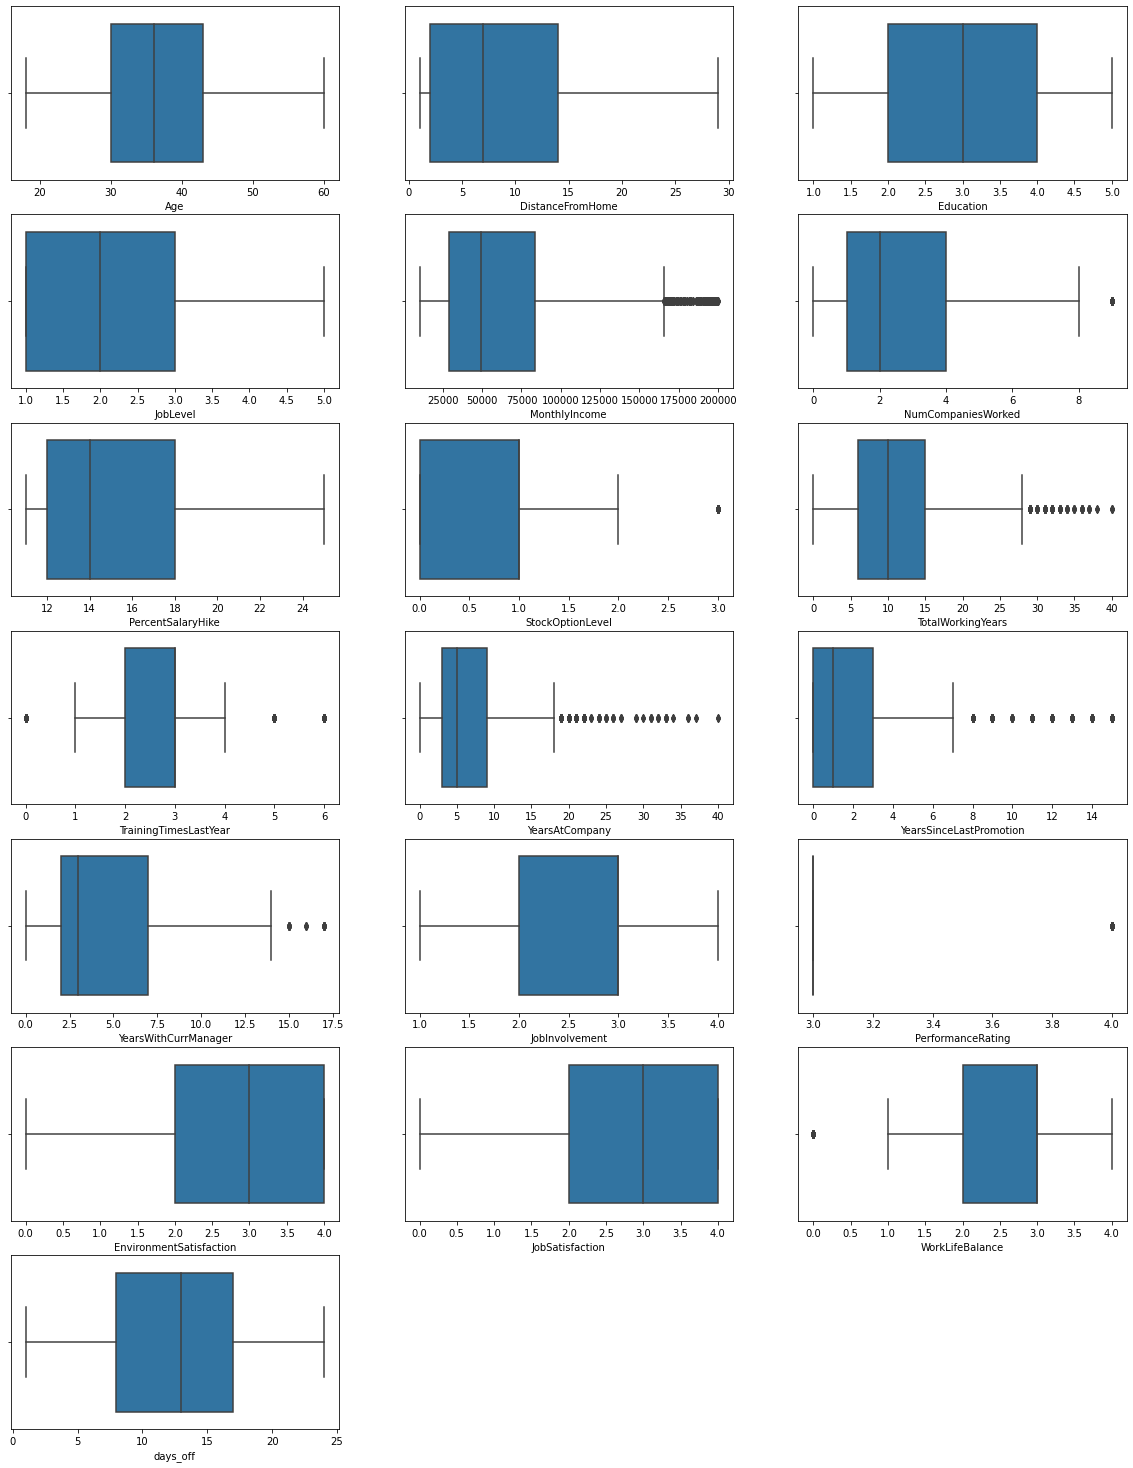

In [65]:
plt.figure(figsize=(20,30))
for index, item in enumerate(numerical_columns, 1):
    plt.subplot(8, 3, index)
    sns.boxplot(attrition[item])
plt.show() 

Is evident that we can spot some potential outliers in some features. For instance: Years Since Last Promotion, Total Working Years, Years at Company & Years With Current Manager. For this reason, we are going to apply log-transformation to these numerical variables in order to make our data more stable and capable to predict (make them more normal bell-shaped distributed)

In [66]:
import copy
attritionv2 = copy.deepcopy(attrition) #creating a copy in our current dataset.
#attrition = attritionv2

cols_to_trans = numerical_columns

In [67]:
for column in cols_to_trans:
    try:
        attrition[column] = np.log1p(attrition[column]) #applying log(x + 1) transformation
    except (ValueError, AttributeError):
        pass

#### 5.2. Encoding Categorical variables (to dummy variables)

In the next steps, when we are encoding to dummy variables, in short, it means that we are assigning a numerical value to each level of categorical variables

In [68]:
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')

In [69]:
dummies = pd.get_dummies(attrition[categorical_columns], drop_first = True)
attrition_dummies = pd.concat([attrition, dummies], axis = 1)
attrition_dummies.drop(categorical_columns, axis = 1, inplace = True)

In [70]:
X = attrition_dummies.drop('Attrition_Yes', axis=1)
y = attrition_dummies['Attrition_Yes']

The new variable "X" will contain the features on the dataset. The variable "y" will contain the target variable: Attrition.

In [71]:
X.head(2)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,days_off,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_IT,Department_Sales,EducationField_Finance,EducationField_HR,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_HR,JobRole_Healthcare Analyst,JobRole_Manager,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Director,JobRole_Senior Director II,JobRole_Technician,MaritalStatus_Married,MaritalStatus_Single
0,3.951244,1.945910,1.098612,0.693147,11.784181,0.693147,2.484907,0.000000,0.693147,1.945910,0.693147,0.000000,0.000000,1.386294,1.386294,1.386294,1.609438,1.098612,2.890372,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3.465736,2.397895,0.693147,0.693147,10.642826,0.000000,3.178054,0.693147,1.945910,1.386294,1.791759,0.693147,1.609438,1.098612,1.609438,1.386294,1.098612,1.609438,2.639057,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition_Yes, dtype: uint8

#### 5.3. Normalizing (Standardize ) numerical features

As part of the process, we are also going to transform our numerical features (already log transformed) to a normalization step. This is basically reducing the variance in our numerical features and make them more stable

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_std = X.columns
attrition_dummies[columns_std] = scaler.fit_transform(attrition_dummies[columns_std])

In [74]:
attrition_dummies.head(3)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,days_off,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_IT,Department_Sales,EducationField_Finance,EducationField_HR,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_HR,JobRole_Healthcare Analyst,JobRole_Manager,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Director,JobRole_Senior Director II,JobRole_Technician,MaritalStatus_Married,MaritalStatus_Single
0,1.418891,-0.041631,-0.768464,-1.09418,1.398738,-0.578407,-1.292677,-1.056106,-2.263063,1.786741,-1.478408,-0.973342,-1.675043,0.427892,-0.426230,0.376473,1.021909,-0.806961,0.781970,0,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.136788,-0.348255,-0.243059,-0.314093,-1.224745,-0.191498,3.197088,-0.273059,-0.533821,-0.244625,-0.239904,-0.330808,-0.462464,1.088232,-0.685565
1,-0.578938,0.486464,-2.147223,-1.09418,-0.319624,-1.610552,1.942306,0.471284,-0.487087,0.305049,-0.026394,-0.117271,0.321789,-0.929802,2.346151,0.376473,-0.468593,1.310550,0.248223,1,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.136788,-0.348255,-0.243059,-0.314093,-1.224745,-0.191498,-0.312785,-0.273059,-0.533821,-0.244625,-0.239904,-0.330808,-0.462464,-0.918921,1.458650
2,-0.452315,1.061870,0.968568,1.63228,1.982468,-0.578407,0.049962,1.998674,-0.705618,-0.456645,-0.026394,-0.973342,0.044935,0.427892,-0.426230,-0.463010,-0.468593,-2.487724,-0.940302,0,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.136788,-0.348255,4.114223,-0.314093,0.816497,-0.191498,-0.312785,-0.273059,1.873287,-0.244625,-0.239904,-0.330808,-0.462464,1.088232,-0.685565


#### 5.4 Checking Multicollinearity

We need to assess those features which are correlated to each other. This is one requirement of the Logistic Regression Algotithm: None of the independent variables should be correlated to each other. 

We are going to use the Variance Inflation Factor (VIF) to meassure the multicollinearity of independent variables. In simple terms VIF equals to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. A high VIF means that the independet variable is highly collinear with the other variables in the model.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vars"] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for index,column in enumerate(X.columns):
    if vif['vif'][index]>5:  #revemoving correlated variables above 5 (which is a fixed critical value)
        vif = vif.drop([index], axis=0)



In [76]:
# We print the remaining variables
print(vif)

                                vars       vif
7                   StockOptionLevel  2.192332
11           YearsSinceLastPromotion  2.925581
19  BusinessTravel_Travel_Frequently  2.868340
23            EducationField_Finance  2.365592
24                 EducationField_HR  1.781798
25          EducationField_Marketing  1.844573
26              EducationField_Other  1.200700
27   EducationField_Technical Degree  1.312600
28                       Gender_Male  2.573481
29                        JobRole_HR  1.191116
30        JobRole_Healthcare Analyst  1.471986
31                   JobRole_Manager  1.386247
32           JobRole_Sales Executive  2.156333
33      JobRole_Sales Representative  1.310118
34           JobRole_Senior Director  1.304319
35        JobRole_Senior Director II  1.519208
36                JobRole_Technician  1.916446
37             MaritalStatus_Married  3.138154
38              MaritalStatus_Single  2.504337


## 6. 0. MODEL BUILDING

In [294]:
columns_vif = list(vif['vars'])
data = attrition_dummies[columns_vif]
data = pd.concat([data, attrition_dummies['Attrition_Yes']], axis=1)

### 6. 1. Training / Testing split

In [295]:
from sklearn.model_selection import train_test_split
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

We are leaving 25% of the data for testing, and so the training data will be 75%

### 6. 2. Assessing balanced / imbalanced classes for the target variable

Before using the supervised machine learning algorithm - Logistic Regression, we need to assess the structure of our target variable (attrition):

Text(0.5, 1.0, 'Percentage of employees that will/will not ')

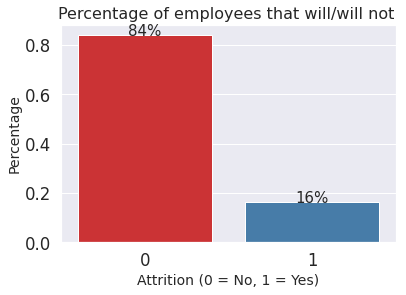

In [296]:
#Ploting barplot for target 
plt.figure(figsize=(6,4))
g = sns.barplot(data['Attrition_Yes'], data['Attrition_Yes'], palette='Set1', estimator=lambda x: len(x) / len(data) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x + width/2, 
               y + height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Attrition (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of employees that will/will not ', fontsize=16)

As we can see, we have an inbalanced dataset in which the majority of employees does not attrit. To deal with this situation, we are going to use select the **class_weight** parameter (i.e. in the Logistic Regression function), and assess which the best value to "weight" our majority class and minority class.

### 6.3.0. Supervised Machine Learning: Logistic Regression

Our first machine learning algorithm that is going to be tested is the Logistic Regression.
Loading necessary packages:

In [410]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, \
                                  precision_score, recall_score, \
                                  auc, precision_recall_curve, \
                                  roc_curve, confusion_matrix, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold

#### 6.3.1. Logistic Regression: Hyper parameter tunning

In [411]:
## 1. APPLYING LOGISTIC REGRESSION ALGORITHM
log_reg = LogisticRegression()

## 2. Setting the range for class weights (to deal with imbalanced classes)

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'lbfgs']

weights = [{0:x, 1:1.0-x} for x in np.linspace(0.0,0.99,100)]

## 3. Creating a dictionary grid for grid search

param_grid = dict(solver = solvers, 
                  class_weight = weights)


## 4. Selecting accuracy metrics: Precision, Recall and F1 Score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score':     make_scorer(f1_score)
}

## 5. HYPER PARAMETER TUNNING

gridsearch = GridSearchCV(estimator= log_reg, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits = 10), 
                          n_jobs=-1, 
                          scoring=scorers,
                          refit= 'f1_score',   #we focus on the F1 metric to display the better results
                          return_train_score=True,
                          verbose=2).fit(X_train.values, y_train.values)



Fitting 10 folds for each of 400 candidates, totalling 4000 fits


#### 6.3.2. Logistic Regression: Displaying results

First, we print the best results for the class weight parameters. As we can see next, for each of the classes 1 and 0, the best result is about 22% for class 0 (no attrition) and 78% for class 1 (attrition)

In [412]:
y_pred = gridsearch.predict(X_test.values)
print('Best params for F1 score')
print(gridsearch.best_params_)

Best params for F1 score
{'class_weight': {0: 0.22, 1: 0.78}, 'solver': 'newton-cg'}


BUILD THE MODEL USING BEST PARAMETERS

In [413]:
log_reg = LogisticRegression(class_weight = {0: 0.22, 1: 0.78}, solver = 'newton-cg')
log_reg.fit(X_train, y_train)
y_pred = gridsearch.predict(X_test.values)

Next, let's display the results for the confusion matrix:

In [414]:
# Function to create a confusion matrix 
def conf_matrix(y_test, log_reg_pred):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_true=y_test, y_pred=log_reg_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    # axis labels
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    title = 'Confusion Matrix'.upper()
    plt.title(title, loc='center')

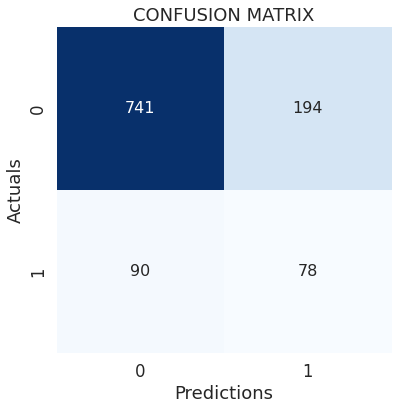

In [415]:
conf_matrix(y_test, y_pred)  

For instance, our model is capturing 78 cases of people who were predict as non-attrition (and actually they were). But at the same time, we have 164 cases in which there was NO ATTRITION, and we predicted them as positive (ATTRITION). However, this is less than 741.

In [416]:
results = pd.DataFrame(gridsearch.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results = results[['param_class_weight', 'mean_test_f1_score', 'mean_test_recall_score', 
                   'mean_test_precision_score'  ]]
results.head(5)


,param_class_weight,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score
0,"{0: 0.0, 1: 1.0}",0.282075,1.0,0.164197
11,"{0: 0.02, 1: 0.98}",0.282075,1.0,0.164197
19,"{0: 0.04, 1: 0.96}",0.282812,1.0,0.164696
18,"{0: 0.04, 1: 0.96}",0.282886,1.0,0.164747
17,"{0: 0.04, 1: 0.96}",0.282812,1.0,0.164696


The previous table give us the results for each selected class weights, and the output metrics(F1, recall and precision)

Lets say that we want to extract the best solution in terms of F1 metric (estimated in previous blocks)

In [417]:
results[results['param_class_weight'].astype(str).str.replace("[{ ,}]", "").str.endswith('0.78')].head(1)

,param_class_weight,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score
91,"{0: 0.22, 1: 0.78}",0.358275,0.437845,0.304883


#### There is other particular way to select the best model. We should focus on the **recall** metric, since the business don't want to miss those employees who attrit. In other words, we don't want the model to incorrectly miss classify the TRUE entries.

#### 6.3.3 Logistic Regression: Precision and Recall graph

In [418]:
y_scores = log_reg.predict_proba(X_test)[:, 1]

In [419]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    

In [420]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

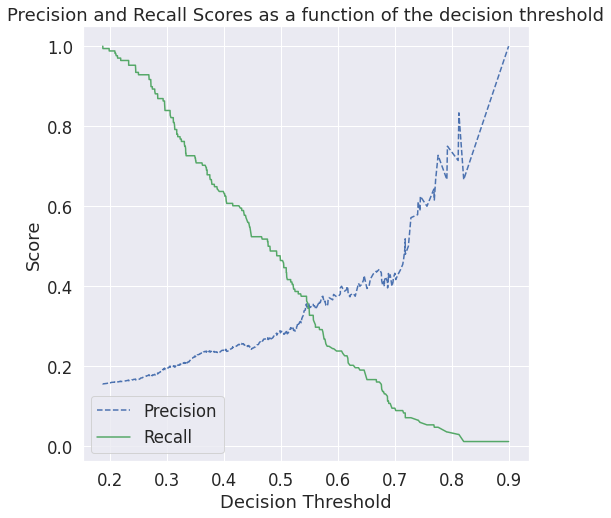

In [421]:
plot_precision_recall_vs_threshold(p, r, thresholds)

By default, the model has selected a threshold of 50%. That means that 0 – 50% the target value is 0 (no attrition), and 50% - 100%, the target value is 1 (attrition). Our commercial business is free to select the threshold which will give the best results.
For the business it matters how well we tell the executive leaders, the likelihood of attrition being positive. Let’s say that we commit an error than the audience that those who will attrit, will not. This is costly.


**Precision** is a good measure to determine, when the costs of **False Positive** is high. For instance, a false positive means that an employee that didn’t attrit (actual negative) has been identified as an employee who attrit (predicted attrition). 

**Recall** on the other hand, actually calculates how many of the **Actual Positives** our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. In our case, if an employee who attrit (Actual Positive) is predicted as non-attrition (Predicted Negative), the consequence can be very bad for our business (we may lose money).

Our recommendation is to start at 55% of threshold: we want our model to efficiently capture (at about 37%) that we will not have false positives, but at the same, we are really capturing the actual positives. Then, we can keep improving the model (or use other models) to give more accurate results.

Using a **Logistic Regression Model** we can see that our top features are: Marital Status (single), Business trave (frequently) and Education Field (HR). These features are impacting positively on the model (likely to attrit). We can also name Job Role (Senior Director II), which is also impacting the attrition but in a negative way. 

### 6.4. Supervised Machine Learning: Decision Trees

The second model that we are going to test is the decision tree algorithm, which is also a supervised machine learning model.

#### 6.4.1 Decision Tree: Hyper parameter tunning

In [425]:
from sklearn.tree import DecisionTreeClassifier

## 1. APPLYING LOGISTIC REGRESSION ALGORITHM
tree_classifier = DecisionTreeClassifier(random_state=0)

## 2. Setting the range for class weights (to deal with imbalanced classes)

depth = [1,5, 10, 15, 20, 25, 30]  #depth of the tree (vertically)
split = [1,2,4,6]                  # how many splits per each node?

## 3. Creating a dictionary grid for grid search

weights = [{0:x, 1:1.0-x} for x in np.linspace(0.0,0.99,100)]

## 3. Creating a dictionary grid for grid search

param_grid = dict(class_weight = weights, max_depth = depth, min_samples_split = split)

## 4. Selecting accuracy metrics: Precision, Recall and F1 Score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score':     make_scorer(f1_score)
}

## 5. HYPER PARAMETER TUNNING

gridsearch = GridSearchCV(estimator= tree_classifier, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits = 10), 
                          n_jobs=-1, 
                          scoring=scorers,
                          refit= 'f1_score',   #we focus on the F1 metric to display the better results
                          return_train_score=True,
                          verbose=2).fit(X_train.values, y_train.values)


    

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


#### 6.4.2 Decision Trees: Displaying results

Best params for F1 score
{'class_weight': {0: 0.22, 1: 0.78}, 'max_depth': 25, 'min_samples_split': 2}


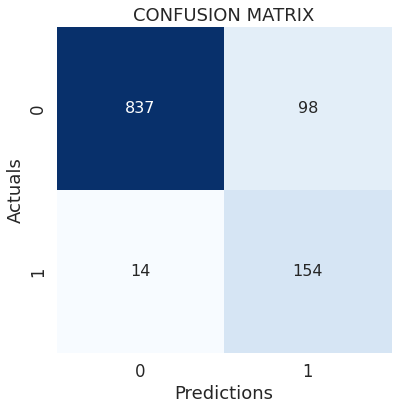

In [426]:
y_pred = gridsearch.predict(X_test.values)
print('Best params for F1 score')
print(gridsearch.best_params_)
conf_matrix(y_test, y_pred)  

#### 6.4.3 Decision Tree: Precision and Recall graph

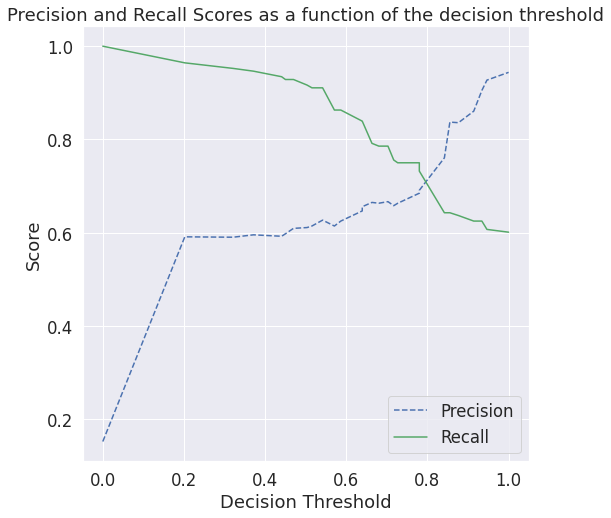

In [427]:
y_scores = gridsearch.predict_proba(X_test)[:, 1]

p, r, thresholds = precision_recall_curve(y_test, y_scores)
plot_precision_recall_vs_threshold(p, r, thresholds) 

We can see that our model accuracy has improved pretty well. Now, if select a new threshold of 80%, then we will be able to a better recall of 65%, which is also the same point as the precision metric.

BUILDING THE DECISION TREE MODEL WITH THE BEST PARAMETERS

In [370]:
tree_classifier_v2 = DecisionTreeClassifier(random_state=0, 
                                         class_weight = {0: 0.22, 1: 0.78}, 
                                         max_depth = 25, min_samples_split = 2)

tree_classifier_v2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.22, 1: 0.78}, max_depth=25,
                       random_state=0)

#### 6.4.4 Decision Tree: Variable Explanation

Let's assess the contribution that each of the features is giving to the model.We are going to achieve this by using **"Shap Values"**. Shap values are a tool that are notable for being able to explain specific predictions from your model. They do this by quantifying the contributions of each individual feature.

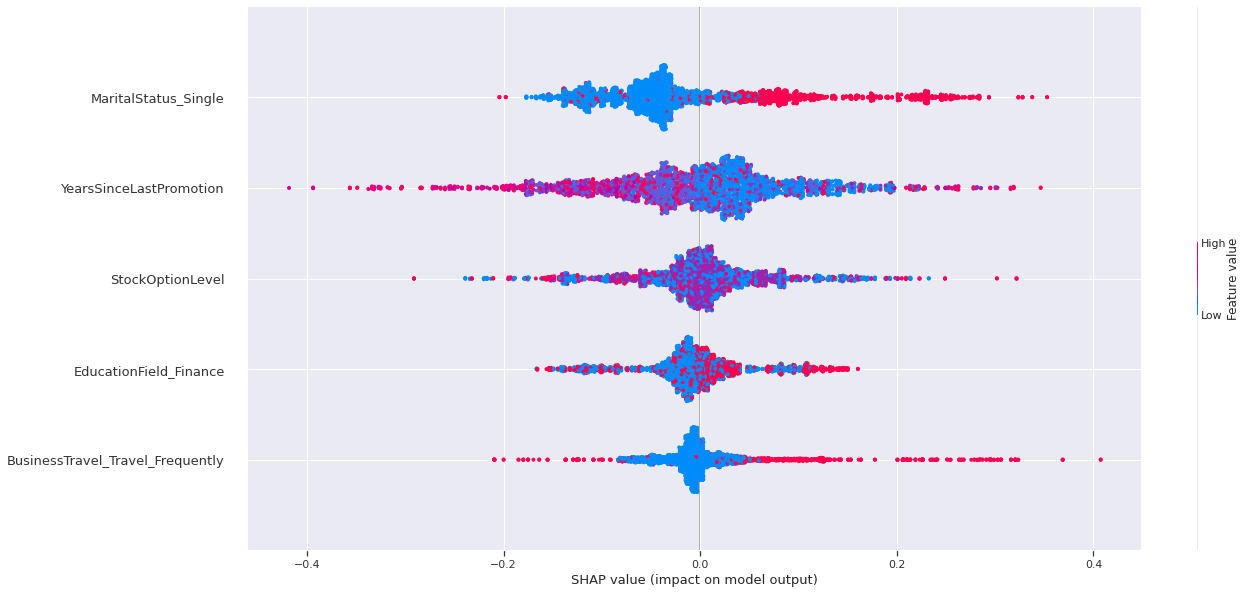

In [501]:
import shap 
explainer = shap.TreeExplainer(tree_classifier_v2, X_train)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values[1], X_train, plot_type="dot", max_display = 5, 
                  auto_size_plot=False, show=False, plot_size=[20,10])

As we can see these are the prominent variables (top 5) on the model: marital status (single), years since last promotion, stock option level, Education Field (Finance) & Business Travel (frequently). 

1. As Marital Status (single) category increases, the likelihood of attrition is higher as well.
2. Majority of points are located in which the "Years since last promotion" is low. In this point, the likelihood of attrition increases.
3. The more the employees travel frequently, the higher likelihood of attrition.

## Final words and recommendations

**A.** During the course of this document, we have applied all basic steps involved in a data science project. Particularly, this project helped us to discover those features that are highly correlated with the attrition rate of our business process solutions segment. 

**B.** By selecting our second model: decision trees algorithm, we were able to improve our prediction accuracy in detecting whether an employee is likely to attrit during the current period. 
    

**C.** By selecting a **decision threshold of 80%** we can convey our business executives that we can use this threshold to map whether an employee will attrit (> 80%), or, on the contrary, the employee will not attrit (< 80%). At this particular point we have reached the maximum accuracy of the model by taking the “recall metric”, at 65% approximately.

**D.** We can improve the accuracy of the model by taking the next steps:

**1.** Using advanced machine learning algorithms (such as neural networks, random forest or Boosting algorithms). Here we have used the traditional models that make the models more explainable due to the small complexity of explanation. It depends on the future discussions whether we should use a black box model to improve our accuracy.

**2.** It’s recommended to collect more data. Here we have only taken the data for 2021. This should help to reduce the BIAS of the model or model selection (amount that a model’s prediction differs from the target value, compared to the training data)

**3.** Collecting more features should also help to improve the accuracy of the models. This depends on the HR department to share more information about each employee. On the other hand, we can also look out for new features such as: number of benefits of the employee, schedule flexibilities, annual performance increase on salary, etc.
